In [2]:
import pandas as pd
import numpy as np

from google.cloud import bigquery
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("C:\\Users\\Joanna Kang\\Documents\\GitHub\\Sales-dashboard\\My First Project-c1aa474eca74.json")
project_id = 'rare-shuttle-279916'

In [3]:
julysale = pd.read_csv("C:\\Users\\Joanna Kang\\Desktop\\TASK\\5. Data Anaylsis\\2020_July_trend\\sales_2020-07-01_2020-07-27.csv")

In [4]:
client = bigquery.Client()

In [5]:
%load_ext google.cloud.bigquery

In [6]:
import google.auth
from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta1

credentials, your_project_id = google.auth.default(
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

# Make clients.
bqclient = bigquery.Client(
    credentials=credentials,
    project= 'rare-shuttle-279916',
)
bqstorageclient = bigquery_storage_v1beta1.BigQueryStorageClient(
    credentials=credentials
)

In [7]:
query_job_1 = client.query('''SELECT * FROM `rare-shuttle-279916.Amazon.productlist_200625` LIMIT 20000
''')
productlist = query_job_1.to_dataframe()

In [8]:
def column_replace(productlist, columns, new_column):
    productlist_before = []
    productlist_new = new_column
    for i in range(len(columns)):
        productlist_before.append(columns[i])

    for i in range(len(new_column)):
        productlist_new.append(new_column[i])

    for i in range(len(productlist_before)):
        productlist = productlist.rename({productlist_before[i] : productlist_new[i]}, axis = 'columns')
    
    productlist = productlist.drop([productlist.index[0]])

    return productlist

productlist = column_replace(productlist, productlist.columns, ['Batch', 'SKU', 'ASIN', 'BARCODE', 'NAME(KR)', 'SKU_2', 'ASIN_2', 'CHARACTER', 'CATEGORY', 'ITEM', 'THEME', 'PRODUCT_NAME(KR)'])

#productlist = productlist.drop([productlist.index[0]])
productlist = productlist.sort_values(by='Batch')

In [9]:
productlist = productlist.drop_duplicates('SKU', keep='last')

In [10]:
productlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 445 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Batch             906 non-null    object
 1   SKU               906 non-null    object
 2   ASIN              708 non-null    object
 3   BARCODE           906 non-null    object
 4   NAME(KR)          906 non-null    object
 5   SKU_2             906 non-null    object
 6   ASIN_2            705 non-null    object
 7   CHARACTER         906 non-null    object
 8   CATEGORY          906 non-null    object
 9   ITEM              906 non-null    object
 10  THEME             906 non-null    object
 11  PRODUCT_NAME(KR)  906 non-null    object
dtypes: object(12)
memory usage: 92.0+ KB


In [11]:
julysale.columns.values[1] = 'SKU'

In [13]:
julysale = pd.merge(julysale, productlist, how = 'left', on = 'SKU')

In [14]:
julysale

product_title       SKU         day  \
0     Baby Dreaming Theme, Plush Headband - Little A...    F10613  2020-07-24   
1                       Cake Card - Apeach, Ryan, Frodo  93008556  2020-07-03   
2              KANGDANIEL EDITION, Body Pillow - Apeach    F10571  2020-07-01   
3                 Yumyum Friends, Keyring - Little Ryan    F11033  2020-07-27   
4                                  Luggage Tag - Apeach    F08285  2020-07-27   
...                                                 ...       ...         ...   
1362    Baby Dreaming Theme, Pyjama Set - Little Apeach    F10664  2020-07-13   
1363              Happy Weeks, Ruled Note - Sunday Tube    F10731  2020-07-06   
1364                       Hugging Body Pillow - Apeach    F10049  2020-07-08   
1365                      Humidifier Filters, Pack of 3    F08961  2020-07-13   
1366                         Card Holder - Heart Apeach    F10655  2020-07-27   

      pos_location_name  net_quantity  gross_sales  discounts  returns  \
0                   NaN             5        66.60     -26.63     0.00   
1                   NaN             4         8.51       0.00     0.00   
2                   NaN             4        79.96       0.00     0.00   
3                   NaN             4        55.93     -22.36     0.00   
4                   NaN             4        20.31       0.00     0.00   
...                 ...           ...          ...        ...      ...   
1362                NaN            -1         0.00       0.00   -47.19   
1363                NaN            -1         0.00       0.00    -6.03   
1364                NaN            -1         0.00       0.00   -22.74   
1365                NaN            -2         0.00       0.00    -8.15   
1366                NaN            -2         0.00       0.00   -18.99   

      net_sales  taxes  ...        ASIN        BARCODE            NAME(KR)  \
0         39.97   8.00  ...  B0883BXBYD  8809681706148   베이비드리밍 세안밴드 리틀어피치   
1          8.51   1.45  ...  B07QVJLFL2  8809641463975      리틀스케치북_카드_생일축하   
2         79.96  16.00  ...  B084D6DY4R  8809681705714       강다니엘에디션 바디필로우   
3         33.57   7.21  ...        None  8809721500279       얌얌 무빙키링_리틀라이언   
4         20.31   3.65  ...           0  8809641461681        PVC 러기지택-어피치   
...         ...    ...  ...         ...            ...                 ...   
1362     -47.19   0.00  ...        None  8809681706674  베이비드리밍 빅페이스파자마(여성)   
1363      -6.03  -0.96  ...  B084JMTXVR  8809681707251      해피위크 공부노트_일 튜브   
1364     -22.74  -4.55  ...  B07YLKGT51  8809681700511        말랑허그바디쿠션_어피치   
1365      -8.15  -1.63  ...        None  8809656130145          프렌즈 가습기 필터   
1366     -18.99  -3.80  ...  B084G8P9ZX  8809681706568          하트어피치 카드지갑   

         SKU_2      ASIN_2          CHARACTER    CATEGORY               ITEM  \
0       F10613  B0883BXBYD             Apeach        Bath          Hairbands   
1     93008556  B07QVJLFL2  Ryan, Apeach, Con  Stationery      Message Cards   
2       F10571  B084D6DY4R             Apeach       Plush        Body pillow   
3       F11033        None               Ryan   Tech&Accs    Airpods Keyring   
4           50           0             Apeach      Travel       Luggage Tags   
...        ...         ...                ...         ...                ...   
1362    F10664        None             Apeach      Living            Pyjamas   
1363    F10731  B084JMTXVR               Tube  Stationery           Notepads   
1364    F10049  B07YLKGT51             Apeach       Plush        Body pillow   
1365    F08961        None                  -        Home  Humidifier Filter   
1366    F10655  B084G8P9ZX             Apeach      Living       Card Wallets   

               THEME    PRODUCT_NAME(KR)  
0      Baby Dreaming   베이비드리밍 세안밴드 리틀어피치  
1     Little Friends      리틀스케치북_카드_생일축하  
2        Kang Daniel       강다니엘에디션 바디필로우  
3     Yamyam Friends       얌얌 무빙키링_리틀라이언  
4              Basic        PVC 러기지택-어피치  
...              ...    

In [15]:
julysale['day'] = pd.to_datetime(julysale['day'])

In [16]:
julysale['dayofweek'] = julysale['day'].dt.week
julysale['year'] = julysale['day'].dt.year
julysale['month'] = julysale['day'].dt.month


In [17]:
julysale = julysale.loc[julysale['month'].isin([7])]
julysale

product_title       SKU        day  \
0     Baby Dreaming Theme, Plush Headband - Little A...    F10613 2020-07-24   
1                       Cake Card - Apeach, Ryan, Frodo  93008556 2020-07-03   
2              KANGDANIEL EDITION, Body Pillow - Apeach    F10571 2020-07-01   
3                 Yumyum Friends, Keyring - Little Ryan    F11033 2020-07-27   
4                                  Luggage Tag - Apeach    F08285 2020-07-27   
...                                                 ...       ...        ...   
1362    Baby Dreaming Theme, Pyjama Set - Little Apeach    F10664 2020-07-13   
1363              Happy Weeks, Ruled Note - Sunday Tube    F10731 2020-07-06   
1364                       Hugging Body Pillow - Apeach    F10049 2020-07-08   
1365                      Humidifier Filters, Pack of 3    F08961 2020-07-13   
1366                         Card Holder - Heart Apeach    F10655 2020-07-27   

      pos_location_name  net_quantity  gross_sales  discounts  returns  \
0                   NaN             5        66.60     -26.63     0.00   
1                   NaN             4         8.51       0.00     0.00   
2                   NaN             4        79.96       0.00     0.00   
3                   NaN             4        55.93     -22.36     0.00   
4                   NaN             4        20.31       0.00     0.00   
...                 ...           ...          ...        ...      ...   
1362                NaN            -1         0.00       0.00   -47.19   
1363                NaN            -1         0.00       0.00    -6.03   
1364                NaN            -1         0.00       0.00   -22.74   
1365                NaN            -2         0.00       0.00    -8.15   
1366                NaN            -2         0.00       0.00   -18.99   

      net_sales  taxes  ...     SKU_2      ASIN_2          CHARACTER  \
0         39.97   8.00  ...    F10613  B0883BXBYD             Apeach   
1          8.51   1.45  ...  93008556  B07QVJLFL2  Ryan, Apeach, Con   
2         79.96  16.00  ...    F10571  B084D6DY4R             Apeach   
3         33.57   7.21  ...    F11033        None               Ryan   
4         20.31   3.65  ...        50           0             Apeach   
...         ...    ...  ...       ...         ...                ...   
1362     -47.19   0.00  ...    F10664        None             Apeach   
1363      -6.03  -0.96  ...    F10731  B084JMTXVR               Tube   
1364     -22.74  -4.55  ...    F10049  B07YLKGT51             Apeach   
1365      -8.15  -1.63  ...    F08961        None                  -   
1366     -18.99  -3.80  ...    F10655  B084G8P9ZX             Apeach   

        CATEGORY               ITEM           THEME    PRODUCT_NAME(KR)  \
0           Bath          Hairbands   Baby Dreaming   베이비드리밍 세안밴드 리틀어피치   
1     Stationery      Message Cards  Little Friends      리틀스케치북_카드_생일축하   
2          Plush        Body pillow     Kang Daniel       강다니엘에디션 바디필로우   
3      Tech&Accs    Airpods Keyring  Yamyam Friends       얌얌 무빙키링_리틀라이언   
4         Travel       Luggage Tags           Basic        PVC 러기지택-어피치   
...          ...                ...             ...                 ...   
1362      Living            Pyjamas   Baby Dreaming  베이비드리밍 빅페이스파자마(여성)   
1363  Stationery           Notepads     Happy Weeks      해피위크 공부노트_일 튜브   
1364       Plush        Body pillow  Little Friends        말랑허그바디쿠션_어피치   
1365        Home  Humidifier Filter           Basic          프렌즈 가습기 필터   
1366      Living       Card Wallets    Heart Apeach          하트어피치 카드지갑   

     dayofweek  year month  
0           30  2020     7  
1           27  2020     7  
2           27  2020     7  
3           31  2020     7  
4           31  2020     7  
...        ...   ...   ...  
1362        29  2020     7  
1363        28  2020     7  
1364        28  2020     7  
1365        29  2020     7  
1366        31  2020     7  

[1367 rows x 25 columns]

In [18]:
julysale.loc[julysale['CATEGORY'] == 'Stationeries', 'CATEGORY'] = 'Stationery'
julysale.loc[julysale['CHARACTER'] == 'All', 'CHARACTER'] = 'Together'

In [19]:
theme_overall = pd.pivot_table(julysale, index = 'THEME', columns=['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins=False)
theme_overall = theme_overall.sort_values(by = 30, ascending= False)
theme_overall

dayofweek          27  28  29   30  31
THEME                                 
Happy Weeks        68  54  70  113  25
Little Friends     73  63  52  111  17
Baby Dreaming      43  44  17   63  16
Basic              69  38  22   55  13
Lemon Terras       31  25  21   45   6
Lovely Apeach      16  13   9   19   5
Yamyam Friends     10   5  11   17  12
Winter Wonderland   2   2   6   14   1
Cheeze Friends      3   3   2   10   0
Pompom Friends      7  10   7    8   3
Kang Daniel        36  14   4    8   2
Heart Apeach        9   6   2    8  -1
Forest Ryan         4   6   2    6   0
Lazy Sunday         3   3   2    3   2
Lovely Ryan         4   1   3    2   0
Honey Friends       0   5   0    1   0
Little friends      1   3   0    1   1
Gentlemen Ryan      0   0   0    1   0
Autumn Story        5   4   5    1   1
Twice               2   1   1    0   0
Battle Ground       1   0   0    0   0

In [20]:
theme_sale = pd.pivot_table(julysale, index = ['THEME', 'CATEGORY', 'ITEM', 'product_title'], columns = ['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)
theme_sale

dayofweek                                                                                            27  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              4   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             1   
               Tech&Accs   Phone Cases          Autumn Story Silicone Iphone X / XS Mobile Phon...    0   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    0   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G            1   
                                                Yumyum Friends, AirPods Case- Little Ryan             3   
                                                Yumyum Friends, AirPods Pro Case - Little Apeach      0   
                                                Yumyum Friends, AirPods Pro Case - Little Ryan        0   
All                                                                                                 387   

dayofweek                                                                                            28  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             2   
               Tech&Accs   Phone Cases          Autumn Story Silicone Iphone X / XS Mobile Phon...    0   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                1   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    0   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G            0   
                                                Yumyum Friends, AirPods Case- Little Ryan             1   
                                                Yumyum Friends, AirPods Pro Case - Little Apeach      0   
                                                Yumyum Friends, AirPods Pro Case - Little Ryan        0   
All                                                                                                 300   

dayofweek                                                                                            29  \
THEME          CATEGORY    ITEM                 product_title                                             
Autumn Story   Plush       Plush Toys           Autumn Story Plush Set - Squirrel Family              2   
               Stationery  Sticky Notes & Memos Autumn Story Memo - Acorn                             3   
               Tech&Accs   Phone Cases          Autumn Story Silicone Iphone X / XS Mobile Phon...    0   
Baby Dreaming  Accessories Canvas Bag           Baby Dreaming Theme, Bag - Little Ryan                0   
                           Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Apeach    1   
...                                                                                                 ...   
Yamyam Friends Tech&Accs   Airpods case         Yumyum Friends, AirPods Case- Little Jay-G            0   
                                                Yumyum Friends, AirPods Case- Little Ryan             0   
                                                Yumyum Friends, AirPods Pro Case - Little Apeach      0   
                                       

In [21]:
littlefriends = theme_sale.query("THEME == ['Little Friends']").head(50)
littlefriends.sort_values(by=30, ascending= False)
#littlefriends.loc[littlefriends[30].isnull()]

Mesh Laundry Bag - Little Muzi                     0   
               Accessories       Card Wallets         Basic Card Holder - Apeach                         0   
                                                      Basic Card Holder - Ryan                           1   
                                 Plush Keyring        Mini Face Plush Keyring - Little Con               1   
                                 Coin Wallets         Coin Wallet - Little Neo                           0   
                                 Keyrings             Keyring - Tiny Apeach                              0   
                                                      Keyring - Tiny Neo                                 0   
                                 Fleece bag           Fleece Tote Bag - Little Ryan                      0   
                                 Socks                Stripe Calf Socks - Tube                           0   
                                 Plush Keyring        Mini Face Plush Keyring - Little Apeach            0   
                                 Coin Wallets         Coin Wallet with Key Ring - Ryan                   2   
               Beauty            Mirrors              Compact Handheld Silicone Mirror - Neo             0   
               Plush             Mini Pillow          Mini Pillow - Little Tube                          0   
                                                      Mini Pillow - Little Frodo                         0   
               Accessories       Coin Wallets         Coin Wallet - Little Ryan                          1   
                                                      Coin Wallet with Band - Apeach                     0   
                                                      Coin Wallet with Band - Neo                        0   
               Plush             Body Pillow          Hugging Body Pillow - Ryan                         0   
               Accessories       Plush Keyring        Mini Face Plush Keyring - Little Muzi              0   
               Pet               Poop bag             Dog Poop Bag Case - Ryan                           0   
                                                      Dog Poop Bag Case - Apeach                         0   
               Home              Humidifier           Humidifier - Little Apeach                         0   
               Living            Umbrellas            Umbrella - Ryan                                    0   
                                 Tumblers             Face Stainless Bottle - Apeach                     0   
               Accessories       Keyrings             Keyring - Tiny Frodo                               0   
               Stationery        Diary set            2020 Diary Set - Ryan (Korean Holiday Ver.)        0   

dayofweek                                                                                               30  \
THEME          CATEGORY          ITEM                 product_title                                          
Little Friends Home              Humidifier           Humidifier - Little Ryan                           4   
               Accessories       Card Wallets         Foldable Card ID Wallet with Neck Strap - Ryan     4   
               Living            Slippers             Indoor Slippers White - Apeach                     4   
               Plush             Body pillow          Hugging Body Pillow - Apeach                       3   
               Beauty            Cosmetics Puff       Makeup Blenders with Case - Apeach                 3   
               Accessories       Plush Keyring        Mini Face Plush Keyring - Little Ryan              3   
               Living            Sleeping Masks       Sleeping Mask - Little Apeach                      3   
               Home              Mood Lamp            Silicone Mood Lamp - Little Ryan                   3   
               Accessories       Keyrings             Keyring - Tiny Jay-G                   

In [22]:
Happyweeks = theme_sale.query("THEME == ['Happy Weeks']").head(50)
Happyweeks.sort_values(by =30, ascending= False)

3   
                        Desk Mat             Happy Weeks, Desk Mat - Apeach                       1   
            Accessories Socks                Socks, Pink - Apeach                                 2   
                                             Socks, Tulip - Apeach                                1   
            Stationery  Notepads             Happy Weeks, A5 Ringbound Notepad - Apeach           5   
                        Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   1   
            Accessories Socks                Socks, Happy Saturday - Ryan & Con                   3   
            Stationery  Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   1   
                        Index Folder         Happy Weeks, Zipper File Folder - Ryan               0   
                        Stickers             Happy Weeks, Diary Decoration Sticker                1   
                        Pen                  Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   0   
                        Book Stand           Happy Weeks, Book Stand- Ryan, Frodo                 0   
                        Desk Mat             Happy Weeks, Desk Mat - Ryan                         0   
                        Pen                  Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   0   
            Accessories Socks                Low Cut Socks - Ryan & Con                           1   
            Stationery  Notepads             Happy Weeks, Ruled Note - Friday Apeach              3   
                                             Happy Weeks, Ruled Note - Wednesday Neo              1   
                        Stickers             Happy Weeks, Face Stickers - Apeach, Muzi            0   
                                             Happy Weeks, Face Stickers - Ryan, Tube              1   
                        Notepads             Happy Weeks, Ruled Note - Saturday Ryan              3   
            Accessories Socks                Low Cut Socks - Muzi & Tube                          1   
            Stationery  Notepads             Happy Weeks, Notepad - Ryan                          0   
                        Index Folder         Happy Weeks, Document Index file - Muzi              0   
                        Corner Pocket        Happy Weeks, Paper Pocket - Apeach                   0   
                        Message Cards        Happy Weeks, Message Card - Muzi                     0   
                        Notepads             Happy Weeks, Notepad - Muzi & Con                    0   
                                             Happy Weeks, A5 Ringbound Notepad - Frodo            1   
                                             Happy Weeks, A5 Ringbound Notepad - Tube             3   
            Accessories Socks                Low Cut Socks - Ryan & Apeach                        2   
            Stationery  Notepads             Happy Weeks, Wirebound Notepad - Apeach              1   
                        Mouse Pad            Happy Weeks, Mouse Pad - Apeach                      0   
                        Message Cards        Happy Weeks, Message Card - Ryan                     0   
                        Notepads             Happy Weeks, Ruled Note - Monday Muzi                1   
                        Letter set           Happy Weeks, Letters and Envelopes Sets - Ryan       0   
                                             Happy Weeks, Letters and Envelopes Sets - Apeach     1   
                        Index Folder         Happy Weeks, Zipper File Folder - Apeach             0   
                        Notepads             Happy Weeks, Ruled Note - Sunday Tube                3   
                        Index Folder         Happy Weeks, Document Index file - Apeach            0   
                        Stickers             Happy Weeks, Removable Stickers - Apeach             0   

dayofweek                                                                       

In [23]:
babydreaming = theme_sale.query("THEME == ['Baby Dreaming']").head(50)
babydreaming.sort_values(by =30, ascending= False)

ng Theme, Mini Pillow - Little Apeach     0   
              Beauty      Hair Velcro          Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   1   
              Accessories Pouches              Baby Dreaming Theme, Glitter Pouch - Ryan            1   
                                               Baby Dreaming Theme, Glitter Pouch - Apeach          1   
                          Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Muzi     1   
              Tech&Accs   Phone Cases          Baby Dreaming Theme, iPhone Case with Strap X/X...   1   
              Bath        Hairbands            Baby Dreaming Theme, Plush Headband - Little Ryan    8   

dayofweek                                                                                          29  \
THEME         CATEGORY    ITEM                 product_title                                            
Baby Dreaming Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Ryan             3   
              Bath        Hairbands            Baby Dreaming Theme, Plush Headband - Little Ap...   0   
              Stationery  Pen                  Baby Dreaming Theme, Double Sided Highlighters,...   1   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Apeach           1   
              Tech&Accs   Airpods case         Baby Dreaming Theme, Glitter AirPods Case - Lit...   0   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Tube             0   
              Tech&Accs   Airpods Keyring      Baby Dreaming Theme, Keyring - Little Ryan           0   
              Beauty      Hair Velcro          Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   2   
              Plush       Plush Toys           Baby Dreaming Theme, Plush - Little Neo              0   
              Living      Pyjamas              Baby Dreaming Theme, Pyjama Dress - Little Ryan      0   
              Tech&Accs   Airpods Keyring      Baby Dreaming Theme, Keyring - Little Apeach         0   
              Plush       Mini Pillow          Baby Dreaming Theme, Mini Pillow - Little Neo        0   
              Stationery  Sticky Notes & Memos Baby Dreaming Theme, Pen Holder & Memo               0   
              Living      Pyjamas              Baby Dreaming Theme, Pyjama Set - Little Apeach      0   
              Stationery  Masking Tape         Baby Dreaming Theme, Masking Tape, Pack of 2         1   
              Accessories Plush Keyring        Baby Dreaming Theme, Plush Keyring - Little Ryan     1   
              Stationery  Stickers             Baby Dreaming Theme, Index Sticker                   0   
                                               Baby Dreaming Theme, Decoration Sticker - Pink       1   
              Living      Pyjamas              Baby Dreaming Theme, Kids Pyjama - Little Apeach     0   
              Stationery  Stickers             Baby Dreaming Theme, Day Index Sticker               0   
                                               Baby Dreaming Theme, Decoration Sticker - Blue       1   
              Beauty      Mirrors              Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                                               Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                          Hair Rollers         Baby Dreaming Theme, Hair Roller - Apeach            0   
                          Cosmetics Puff       Baby Dreaming Theme, Makeup Blender  -  Apeach       0   
                          Brush                Baby Dreaming Theme, Hair Brush - Apeach             1   
              Tech&Accs   Phone Cases          Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
              Accessories Pouches              Baby Dreaming Theme, Cosmetic Pouch - Little Ap...   3   
              Tech&Accs   Airpods case         Baby Dreaming Theme, Glitter AirPods Case - Lit...   0   
                          Phone Cases          Baby Dreaming Theme,

In [24]:
basic = theme_sale.query("THEME == ['Basic']").head(50)
basic.sort_values(by = 30, ascending= False)

Neo                                       0   
                        Body Pillow               Soft Body Pillow - Apeach                         0   
      Tech&Accs         Airpods Pouch             Mini Pouch - Apeach                               0   
                        Airpods case              AirPods Case Cover with Keyring - Apeach          0   
                                                  AirPods Case Cover with Keyring -Ryan             1   
                        Phone Cases               Popsockets - Apeach, Iconic Pattern               1   
      Summer            Inflatables & Pool Floats Swim Ring (Ryan)                                  0   
      Plush             Body Pillow               Soft Body Pillow - Frodo                          0   
      Tech&Accs         Phone Cases               Popsockets - Ryan                                 0   
      Living            Tumblers                  Basic Stainless Tumbler - Ryan, White             1   
      Accessories       Pin badge                 Metal Pin Badges - Frog Tube                      0   
                                                  Metal Pin Badges - Peach Apeach                   0   
      Kitchen & Laundry Silicone Holder           Silicone Hanging Holder - Ryan                    1   
      Home              Desk Humidifier           Humidifier - Ryan                                -1   
      Tech&Accs         Phone Cases               Phonecase (iPhone X/XS, Galaxy S105G) - Con       0   
                                                  Phonecase ( iPhone 11 / iPhone 11 Pro) - Con      0   
                                                  Phonecase ( iPhone 11 / iPhone 11 Pro) - Apeach   1   
      Accessories       Pin badge                 Metal Pin Badges - Tube                           1   
                        Plush Keyring             Mini Face Plush Keyring - Muzi                    0   
                                                  Mini Face Plush Keyring - Ryan                    0   
      Bath              Toothbrush                Toothbrush with Brush Case - Ryan                 0   
      Home              Desk Humidifier           Humidifier - Apeach                              -1   
      Plush             Body Pillow               Hoodie Body Pillow - Muzi & Con                   0   
      Home              Fans                      Portable Fan with Cradle Stand - Apeach           0   
      Plush             Body Pillow               Hoodie Body Pillow - Apeach                       0   
      Stationery        Pen                       Spinning Retractable Gel Pen - Neo                1   
                                                  Retractable Gel Pen - Ryan (with Ribbon)          1   
      Plush             Plush Toys                Plush - Tube                                      0   
      Home              Humidifier Filter         Humidifier Filters, Pack of 3                    -2   
      Living            Body Pillow               Hoodie Body Pillow - Ryan                        -1   
                        Mugs                      Basic White Mug - Ryan                            0   
      Plush             Face Cushions             Soft Face Cushion - Jay-G                         0   
                                                  Soft Face Cushion (M) - Apeach                    1   
                        Body Pillow               Soft Body Pillow - Ryan                           5   
      Home              Fans                      Portable Fan with Cradle Stand - Ryan             0   

dayofweek                                                                                          30  \
THEME CATEGORY          ITEM                      product_title                                         
Basic Living            Tumblers                  Basic Stainless Tumbler - Ryan, Black             4   
      Tech&Accs         Airpods Pouch             Mini Pouch - Ryan

In [25]:
lemonterrace = theme_sale.query("THEME == ['Lemon Terras']").head(50)
lemonterrace.sort_values(by = 30, ascending= False)

dayofweek                                                                                27  \
THEME        CATEGORY    ITEM                 product_title                                   
Lemon Terras Plush       Plush Toys           Lemon Terrace, Plush - Apeach               2   
             Bath        Hairbands            Lemon Terrace, Headband - Apeach            3   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Apeach            2   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Apeach        2   
             Accessories Canvas bag           Yumyum Friends, Tote bag - Little Apeach    4   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Ryan          2   
             Living      Pyjamas              Lemon Terrace, Pyjama Set - Apeach          2   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Ryan              3   
                         Plush Keyring        Lemon Terrace, Plush Keyring - Con          0   
                         Pouches              Lemon Terrace, Face Pouch - Ryan            1   
             Stationery  Clip board           Lemon Terrace, A4 Clipboard                 0   
             Living      Pyjamas              Lemon Terrace, Pyjama Set - Ryan            1   
             Accessories Socks                Low Cut Socks - Ryan & Apeach & Con         0   
             Stationery  Pencil Cases         Lemon Terrace, Pencil Case                  0   
                         Notepads             Lemon Terrace, Notepad & Pen Set - Ryan     0   
             Accessories Socks                Low Cut Socks - Ryan & Con                  1   
                         Pouches              Lemon Terrace, Face Pouch - Apeach          0   
                         Canvas bag           Yumyum Friends, Tote bag - Little Jay-G     1   
             Living      Pyjamas              Lemon Terrace, Pyjama Dress - Apeach        0   
             Plush       Plush Toys           Lemon Terrace, Plush - Ryan                 4   
             Stationery  Notepads             Lemon Terrace, Notepad & Pen Set - Apeach   1   
             Bath        Bathrobes            Lemon Terrace, Tube Bathrobe                1   
             Stationery  Sticky Notes & Memos Lemon Terrace, Sticky Note - Apeach         0   
                                              Lemon Terrace, Sticky Note - Ryan           1   

dayofweek                                                                                28  \
THEME        CATEGORY    ITEM                 product_title                                   
Lemon Terras Plush       Plush Toys           Lemon Terrace, Plush - Apeach               4   
             Bath        Hairbands            Lemon Terrace, Headband - Apeach            2   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Apeach            2   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Apeach        3   
             Accessories Canvas bag           Yumyum Friends, Tote bag - Little Apeach    4   
             Plush       Face Cushions        Lemon Terrace, Face Cushion - Ryan          2   
             Living      Pyjamas              Lemon Terrace, Pyjama Set - Apeach          0   
             Accessories Hair Tie             Lemon Terrace, Hair Tie - Ryan              3   
                         Plush Keyring        Lemon Terrace, Plush Keyring - Con          0   
                         Pouches              Lemon Terrace, Face Pouch - Ryan            0   
             Stationery  Clip board           Lemon Terrace, A4 Clipboard                 1   
             Living      Pyjamas              Lemon Terrace, Pyjama Set - Ryan            1   
             Accessories Socks                Low Cut Socks - Ryan & Apeach & Con         0   
             Stationery  Pencil Cases         Lemon Terrace, Pencil Case                  0   
         

In [26]:
Yamyam = theme_sale.query("THEME == ['Yamyam Friends']").head(50)
Yamyam.sort_values(by = 30, ascending= False)

dayofweek                                                                                          27  \
THEME          CATEGORY          ITEM            product_title                                          
Yamyam Friends Tech&Accs         Airpods case    Yumyum Friends, AirPods Pro Case - Little Ryan     0   
               Kitchen & Laundry Trivet          Yumyum Friends, Trivet - Little Apeach             0   
                                                 Yumyum Friends, Trivet - Little Ryan               0   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Ryan          2   
               Accessories       Canvas bag      Yumyum Friends, Mini bag - Little Apeach           0   
               Tech&Accs         Airpods Keyring Yumyum Friends, Keyring - Little Apeach            0   
                                                 Yumyum Friends, Keyring - Little Ryan              0   
                                 Airpods case    Yumyum Friends, AirPods Case - Little Tube         0   
                                                 Yumyum Friends, AirPods Case- Little Jay-G         1   
                                                 Yumyum Friends, AirPods Case- Little Ryan          3   
                                                 Yumyum Friends, AirPods Pro Case - Little Apeach   0   
               Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Apeach      0   
                                 Pouches         Yumyum Friends, Pouch - Little Ryan                1   
                                                 Yumyum Friends, Pouch - Little Apeach              2   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Apeach        0   
               Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Ryan        1   
               Tech&Accs         Airpods case    Yumyum Friends, AirPods Case- Little Apeach        0   

dayofweek                                                                                          28  \
THEME          CATEGORY          ITEM            product_title                                          
Yamyam Friends Tech&Accs         Airpods case    Yumyum Friends, AirPods Pro Case - Little Ryan     0   
               Kitchen & Laundry Trivet          Yumyum Friends, Trivet - Little Apeach             0   
                                                 Yumyum Friends, Trivet - Little Ryan               0   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Ryan          3   
               Accessories       Canvas bag      Yumyum Friends, Mini bag - Little Apeach           0   
               Tech&Accs         Airpods Keyring Yumyum Friends, Keyring - Little Apeach            0   
                                                 Yumyum Friends, Keyring - Little Ryan              0   
                                 Airpods case    Yumyum Friends, AirPods Case - Little Tube         0   
                                                 Yumyum Friends, AirPods Case- Little Jay-G         0   
                                                 Yumyum Friends, AirPods Case- Little Ryan          1   
                                                 Yumyum Friends, AirPods Pro Case - Little Apeach   0   
               Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Apeach      1   
                                 Pouches         Yumyum Friends, Pouch - Little Ryan                0   
                                                 Yumyum Friends, Pouch - Little Apeach              0   
               Living            Coin Wallets    Yumyum Friends, Coin Wallet - Little Apeach        0   
               Accessories       Canvas bag      Yumyum Friends, Mini Tote bag - Little Ryan        0   
               Tech&Accs         Airpods case    Yumyum Friends, AirPods Case- Little Apeach        0   

dayofwee

In [27]:
category_overall = pd.pivot_table(julysale,index = ['CATEGORY'], columns = ['dayofweek'], values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = False)
category_overall = category_overall.sort_values(by = 30, ascending=False)
category_overall

dayofweek          27  28  29   30  31
CATEGORY                              
Stationery         98  50  66  132  30
Accessories        86  65  54   91  19
Tech&Accs          46  50  36   74  21
Plush              61  40  34   61   9
Living             41  42  22   53   9
Beauty             10  15   5   19   3
Travel             14   8   7   17   4
Bath               12  17   3   12   2
Kitchen & Laundry   0   0   3   12   2
Home               10  13   2    9   1
Summer              0   0   0    3   0
Toys                3   0   1    3   2
Pet                 3   0   0    0   0
Winter              3   0   3    0   1

In [28]:
category_sale = pd.pivot_table(julysale,index = ['CATEGORY', 'ITEM', 'NAME(KR)', 'product_title' ], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [29]:
category_sale  = category_sale.sort_values(by = 30, ascending = False)
category_sale

dayofweek                                                                                           27  \
CATEGORY    ITEM         NAME(KR)              product_title                                             
All                                                                                                387   
Plush       Plush Toys   베이비드리밍 러블리애착인형_라이언    Baby Dreaming Theme, Plush - Little Ryan              4   
Stationery  Notepads     해피위크 커버노트_라이언         Happy Weeks, PVC Cover Ruled Notepad - Ryan           2   
Bath        Hairbands    베이비드리밍 세안밴드 리틀어피치     Baby Dreaming Theme, Plush Headband - Little Ap...    4   
Tech&Accs   Airpods case 에어팟프로 케이스 핑거링세트 리틀어피치 AirPods Pro Case Cover with Keyring -Little Apeach    1   
...                                                                                                ...   
Plush       Mini Pillow  베이비필로우_러블리라이언         Mini Pillow - Lovely Ryan                             0   
            Plush Toys   레몬테라스 향기인형_라이언        Lemon Terrace, Plush - Ryan                           4   
                         베이비드리밍 러블리애착인형_프로도    Baby Dreaming Theme, Plush - Little Frodo             1   
Accessories Pin badge    트와이스에디션 핀뱃지_지효        TWICE Edition, Metal Pin Badges - Jihyo + Neo         0   
Bath        Hairbands    베이비드리밍 세안밴드 리틀라이언     Baby Dreaming Theme, Plush Headband - Little Ryan     2   

dayofweek                                                                                           28  \
CATEGORY    ITEM         NAME(KR)              product_title                                             
All                                                                                                300   
Plush       Plush Toys   베이비드리밍 러블리애착인형_라이언    Baby Dreaming Theme, Plush - Little Ryan              5   
Stationery  Notepads     해피위크 커버노트_라이언         Happy Weeks, PVC Cover Ruled Notepad - Ryan           0   
Bath        Hairbands    베이비드리밍 세안밴드 리틀어피치     Baby Dreaming Theme, Plush Headband - Little Ap...    4   
Tech&Accs   Airpods case 에어팟프로 케이스 핑거링세트 리틀어피치 AirPods Pro Case Cover with Keyring -Little Apeach    1   
...                                                                                                ...   
Plush       Mini Pillow  베이비필로우_러블리라이언         Mini Pillow - Lovely Ryan                             0   
            Plush Toys   레몬테라스 향기인형_라이언        Lemon Terrace, Plush - Ryan                           0   
                         베이비드리밍 러블리애착인형_프로도    Baby Dreaming Theme, Plush - Little Frodo             0   
Accessories Pin badge    트와이스에디션 핀뱃지_지효        TWICE Edition, Metal Pin Badges - Jihyo + Neo         0   
Bath        Hairbands    베이비드리밍 세안밴드 리틀라이언     Baby Dreaming Theme, Plush Headband - Little Ryan     8   

dayofweek                                                                                           29  \
CATEGORY    ITEM         NAME(KR)              product_title                                             
All                                                                                                236   
Plush       Plush Toys   베이비드리밍 러블리애착인형_라이언    Baby Dreaming Theme, Plush - Little Ryan              3   
Stationery  Notepads     해피위크 커버노트_라이언         Happy Weeks, PVC Cover Ruled Notepad - Ryan           2   
Bath        Hairbands    베이비드리밍 세안밴드 리틀어피치     Baby Dreaming Theme, Plush Headband - Little Ap...    0   
Tech&Accs   Airpods case 에어팟프로 케이스 핑거링세트 리틀어피치 AirPods Pro Case Cover with Keyring -Little Apeach    2   
...                                                                                                ...   
Plush       Mini Pillow  베이비필로우_러블리라이언         Mini Pillow - Lovely Ryan                             0   
            Plush Toys   레몬테라스 향기인형_라이언        Lemon Terrace, Plush - Ryan                           0   
                         베이비드리밍 러블리애착인형_프로도    Baby Dreaming Theme, Plush - Little Frodo             0   
Accessories Pin badge    트와이스에디션 핀뱃지_지효        TWICE Edition, Metal Pin Badg

In [30]:
accessories = category_sale.query("CATEGORY == ['Accessories']").head(50)
accessories.sort_values(by = 30, ascending = False)

1   
            Card Wallets  목걸이카드지갑-리틀어피치       Foldable Card ID Wallet with Neck Strap - Apeach     0   
            Plush Keyring 레몬테라스 미니키체인_콘       Lemon Terrace, Plush Keyring - Con                   1   
            Keyrings      강다니엘에디션 투명키링_날아라냥이  KANGDANIEL EDITION, Acrylic Keyring - Flying Ap...   1   
            Plush Keyring 미니페이스키링_어피치         Mini Face Plush Keyring - Apeach                     0   
            Pouches       레몬테라스 페이스파우치_라이언    Lemon Terrace, Face Pouch - Ryan                     0   
            Plush Keyring 베이비드리밍 드림키체인_라이언    Baby Dreaming Theme, Plush Keyring - Little Ryan     1   
            Socks         프렌즈스토리삭스(여성)_방콕타임   Low Cut Socks - Ryan & Con                           1   
            Card Wallets  젠틀맨라이언 명함지갑-패턴      Gentleman Card Holder - Ryan                         0   
            Plush Keyring 윈터원더랜드 미니키체인_프로도    Winter Wonderland Collection, Key Chain - Frodo      0   
            Keyrings      타이니프렌즈_네오           Keyring - Tiny Neo                                   0   
            Hoodie        강다니엘에디션 블랙후디(유니섹스)  KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   1   
            Hair Tie      폼폼프렌즈 헤어스트링_곰돌이라이언  Hair band, Pompom Friends - Polar Bear Ryan          0   
            Fleece bag    부클에코백 리틀라이언         Fleece Tote Bag - Little Ryan                        0   
            Coin Wallets  치즈 동전지갑 라이언         Cheese Friends, Coin Wallet - Ryan                   0   
            Socks         프렌즈스트라이프삭스(남성)_튜브   Stripe Calf Socks - Tube                             0   
            Plush Keyring 윈터원더랜드 미니키체인_라이언    Winter Wonderland Collection, Key Chain - Ryan       1   
            Socks         프렌즈스토리삭스(여성)_해피애프터눈 Low Cut Socks - Ryan                                 0   
                          프렌즈스토리삭스(여성)_춘곤증    Low Cut Socks - Muzi & Tube                          1   
                          프렌즈스토리삭스(여성)_레몬프렌즈  Low Cut Socks - Ryan & Apeach & Con                  1   
                          프렌즈스토리삭스(여성)_레몬트리   Low Cut Socks - Ryan & Con                           0   
            Coin Wallets  동전지갑-리틀네오           Coin Wallet - Little Neo                             0   
            Keyrings      피규어키링-어피치블라썸        Keyring - Apeach (Peach Ver.)                        1   
            Canvas bag    얌얌 미니 에코백_리틀어피치     Yumyum Friends, Mini Tote bag - Little Apeach        3   
                          얌얌 미니백_리틀어피치        Yumyum Friends, Mini bag - Little Apeach             0   
                          얌얌 에코백_리틀제이지        Yumyum Friends, Tote bag - Little Jay-G              0   
            Card Wallets  베이직카드지갑 라이언         Basic Card Holder - Ryan                             1   
                          베이직카드지갑 어피치         Basic Card Holder - Apeach                           0   
            Plush Keyring 윈터원더랜드 미니키체인_무지     Winter Wonderland Collection, Key Chain - Muzi       0   
                          윈터원더랜드 미니키체인_어피치    Winter Wonderland Collection, Key Chain - Apeach     0   
                          윈터원더랜드 미니키체인_네오     Winter Wonderland Collection, Key Chain - Neo        0   
                          미니페이스키링_리틀콘         Mini Face Plush Keyring - Little Con                 1   
            Keyrings      타이니프렌즈_어피치          Keyring - Tiny Apeach                                0   
            Pin badge     프렌즈뱃지_어피치블라썸        Metal Pin Badges - Peach Apeach                      0   
            Keyrings      하트어피치 거울키링          Mirror Keyring - Heart Apeach                        0   
            Pin badge     프렌즈뱃지_개구리 튜브        Metal Pin Badges - Frog Tube                         0   
            Pouches       치즈 삼각파우치 어피치        Cheese Friends, Pouch - Apeach                       0   

dayofweek                                                                                         30  \
CATEGORY    ITEM          NAME(KR)            product_title                                            
Accessories Socks         프렌즈미디움삭스(공용)_해피위

In [31]:
stationery = category_sale.query("CATEGORY == ['Stationery']").head(50)
stationery.sort_values(by = 30, ascending=False)

essage Cards        리틀스케치북_카드_어피치            Cake Card - Apeach                                   1   
           Stickers             귀염귀염스티커_리틀네오             Decoration Sticker - Little Neo                      0   
           Pen                  형광펜 3색_리틀어피치세트           Retractable Highlighters Pen Set - Little Apeach     0   
           Stickers             귀염귀염스티커_리틀제이지            Decoration Sticker - Little Jay-G                    0   
                                귀염귀염스티커_리틀어피치            Decoration Stickers - Little Apeach                  0   
                                해피위크 페이스스티커_라이언&튜브       Happy Weeks, Face Stickers - Ryan, Tube              1   
           Pencil Cases         레몬테라스 클리어필통              Lemon Terrace, Pencil Case                           0   
           Stickers             해피위크 페이스스티커_어피치&무지       Happy Weeks, Face Stickers - Apeach, Muzi            0   
           Pencil Cases         글리터 필통_복숭아 러블리어피치        Glitter pencil case - Peach Apeach                   1   
           Notepads             레몬테라스 노트펜세트_라이언          Lemon Terrace, Notepad & Pen Set - Ryan              0   
           Pen                  형광펜 3색_리틀라이언세트           Retractable Highlighters Pen Set - Little Ryan       0   
           Pencil Cases         리틀프렌즈전신필통_라이언            Plush Pencil Case - Ryan                             0   
           Notepads             리틀스케치북_미니노트_네오           Mini A6 Ruled Notepad - Neo                          0   
           Corner Pocket        해피위크 코너포켓_어피치            Happy Weeks, Paper Pocket - Apeach                   0   
           Message Cards        해피위크 미니카드_무지             Happy Weeks, Message Card - Muzi                     0   
                                윈터원더랜드 프로도&네오 카드         Winter Wonderland Collection, Card - Frodo & Neo     0   
           Index Folder         해피위크 인덱스파일(3칸)_무지        Happy Weeks, Document Index file - Muzi              0   
           Stickers             베이비드리밍 인덱스스티커_요일표시       Baby Dreaming Theme, Day Index Sticker               0   

dayofweek                                                                                                    30  \
CATEGORY   ITEM                 NAME(KR)                 product_title                                            
Stationery Notepads             해피위크 커버노트_라이언            Happy Weeks, PVC Cover Ruled Notepad - Ryan          7   
           Pen                  해피위크 모나미153(4개)_어피치와 친구들 Happy Weeks, Ballpoint Pen Set, 0.7mm Black ink...   6   
           Message Cards        해피위크 미니카드_어피치            Happy Weeks, Message Card - Apeach                   5   
           Sticky Notes & Memos 해피위크 점착메모세트              Happy Weeks, Sticky Note Set                         5   
           Index Folder         해피위크 인덱스파일(3칸)_라이언       Happy Weeks, Document Index file - Ryan              5   
           Notepads             해피위크 커버노트_어피치            Happy Weeks, PVC Cover Ruled Notepad - Apeach        5   
                                해피위크 A5 스프링노트_라이언        Happy Weeks, A5 Ringbound Notepad - Ryan             4   
                                해피위크 공부노트_화 프로도          Happy Weeks, Ruled Note - Tuesday Frodo              4   
           Stickers             해피위크 리무버블스티커_라이언         Happy Weeks, Removable Stickers - Ryan               4   
           Pen                  러블리어피치 클리어샤프             Mechanical Pencil - Lovely Apeach                    4   
                                베이비드리밍 데코트윈펜 5pcs 세트     Baby Dreaming Theme, Double Sided Highlighters,...   4   
           Message Cards        리틀스케치북_카드_생일축하           Cake Card - Apeach, Ryan, Frodo                      3   
           Desk Mat             해피위크 슬림데스크매트_핑크          Happy Weeks, Desk Mat - Apeach                       3   
           Pen                  도리도리 무빙펜-라이언             Spinning Retractable Gel Pen - Ryan                  3   
           Sticky Notes & Memos 미니 체크리스트_러블리어피치          Mini Checklist - Apeach                     

In [32]:
plush = category_sale.query("CATEGORY == ['Plush']").head(50)
plush.sort_values(by = 30, ascending=False)

Plush Toys    윈터원더랜드 멜로디 세트인형    Winter Wonderland Collection, Melody Soft Plush      0   
         Face Cushions 미니얼굴쿠션_네오          Soft Face Cushion - Neo                              1   
         Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                        0   
                       아장아장프렌즈_무지         Plush - Muzi                                         0   
                       아장아장프렌즈_네오         Plush - Neo                                          0   
                       메리_꼬마자석인형_어피치      Merry Friends, Magnetic Plush - Apeach               0   
                       아장아장프렌즈_어피치        Plush - Apeach                                       0   
         Face Cushions 페이스말랑쿠션_어피치        Soft Face Cushion (M) - Apeach                       5   
         Plush Toys    레몬테라스 향기인형_라이언     Lemon Terrace, Plush - Ryan                          0   
         Mini Pillow   베이비필로우_러블리라이언      Mini Pillow - Lovely Ryan                            0   
                       베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo      0   
                       베이비드리밍 타이니프렌즈_어피치  Baby Dreaming Theme, Mini Pillow - Little Apeach     0   
                       베이비드리밍 타이니프렌즈_라이언  Baby Dreaming Theme, Mini Pillow - Little Ryan       0   
                       꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                           2   
                       꿀잠베이비필로우_튜브        Mini Pillow - Little Tube                            0   
         Body pillow   강다니엘에디션 바디필로우      KANGDANIEL EDITION, Body Pillow - Apeach             0   
         Face Cushions 미니얼굴쿠션_제이지         Soft Face Cushion - Jay-G                            0   
         Body Pillow   후디바디필로우_어피치        Hoodie Body Pillow - Apeach                          1   
                       말랑허그바디쿠션_라이언       Hugging Body Pillow - Ryan                           1   
                       리틀바디필로우_튜브         Soft Body Pillow - Tube                              2   
                       리틀바디필로우_라이언        Soft Body Pillow - Ryan                              0   
                       후디바디필로우_무지앤콘       Hoodie Body Pillow - Muzi & Con                      2   
         Plush Toys    아장아장프렌즈_튜브         Plush - Tube                                         0   
                       베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo            0   

dayofweek                                                                                     29  \
CATEGORY ITEM          NAME(KR)           product_title                                            
Plush    Plush Toys    베이비드리밍 러블리애착인형_라이언 Baby Dreaming Theme, Plush - Little Ryan             3   
                       레몬테라스 향기인형_어피치     Lemon Terrace, Plush - Apeach                        4   
                       베이비드리밍 러블리애착인형_어피치 Baby Dreaming Theme, Plush - Little Apeach           1   
         Face Cushions 레몬테라스 얼굴쿠션_어피치     Lemon Terrace, Face Cushion - Apeach                 1   
                       미니얼굴쿠션_어피치         Soft Face Cushion - Apeach                           2   
         Plush Toys    윈터원더랜드 미니쿠키라이언     Winter Wonderland Collection, Plush - Mini Cook...   1   
         Body pillow   말랑허그바디쿠션_어피치       Hugging Body Pillow - Apeach                         2   
         Plush Toys    포레스트_라이언인형         Forest Theme, Plush - Ryan                           0   
                       베이비드리밍 러블리애착인형_튜브  Baby Dreaming Theme, Plush - Little Tube             0   
         Face Cushions 레몬테라스 얼굴쿠션_라이언     Lemon Terrace, Face Cushion - Ryan                   5   
         Mini Pillow   베이비필로우_러블리어피치      Mini Pillow - Lovely Apeach                          4   
                       꿀잠베이비필로우_어피치       Mini Pillow - Little Apeach                          0   
                       베이비드리밍 타이니프렌즈_네오   Baby Dreaming Theme, Mini Pillow - Little Neo        0   
         Plush Toys    베이비드리밍 러블리애착인형_네오  Baby Dreaming Theme, Plush - Little Neo              0   
        

In [33]:
techacc = category_sale.query("CATEGORY == ['Tech&Accs']").head(50)
techacc.sort_values(by = 30 , ascending = False) 

Phone Cases       팝소켓_아이코닉패턴 (어피치)           Popsockets - Apeach, Iconic Pattern                  1   
          Airpods Keyring   아크릴 에어팟 키링 리틀라이언           Acrylic Keyring - Ryan                               1   
          Phone Cases       강다니엘에디션 입체케이스(Ix/xs)       KANGDANIEL EDITION, Silicone Phonecase  ( iPhon...   1   
          Airpods case      얌얌 에어팟케이스_리틀튜브             Yumyum Friends, AirPods Case - Little Tube           1   
          Airpods Keyring   폼폼프렌즈 폼폼퍼 에어팟키링_콘          Keyring - Pompom Friends Faux fur, Con               1   
                            치즈 에어팟키링 어피치               Cheese Friends, Metal Keyring - Apeach               0   
                            에어팟키링-리틀무지                 Keyring for AirPods cases - Little Muzi              0   
                            얌얌 무빙키링_리틀어피치              Yumyum Friends, Keyring - Little Apeach              0   
          Phone Cases       팝소켓_베이직페이스 (라이언)           Popsockets - Ryan                                    0   
          Airpods Pouch     미니파우치 어피치                  Mini Pouch - Apeach                                  0   
          Airpods case      얌얌 에어팟케이스_리틀제이지            Yumyum Friends, AirPods Case- Little Jay-G           0   
                            얌얌 에어팟케이스_리틀라이언            Yumyum Friends, AirPods Case- Little Ryan            0   
          Airpods Keyring   얌얌 무빙키링_리틀라이언              Yumyum Friends, Keyring - Little Ryan                1   
          Airpods case      얌얌 에어팟프로 케이스_리틀어피치         Yumyum Friends, AirPods Pro Case - Little Apeach     0   
                            치즈 에어팟케이스 라이언              Cheese Friends, Silicone AirPods Case Cover - Ryan   0   
          Mouse Pad         해피위크 마우스패드_무지              Happy Weeks, Mouse Pad - Muzi                        0   
          Phone Cases       (IX/XS)어텀스토리 케이스 어피치       Autumn Story Silicone Iphone X / XS Mobile Phon...   0   
                            (I11)베이비드리밍 TPU케이스 어피치     Baby Dreaming Theme, iPhone Case (X,XS / 11 / 1...   0   
                            (IX/XS)치즈 피규어 케이스 라이언      Cheese Friends, iPhone Mobile Phone Case (X,XS ...   1   
          USB Cables & Accs [5pin]케이블보호캡-리틀라이언         USB A to Mini USB B Android Cable With Protecto...   0   
          Airpods case      얌얌 에어팟케이스_리틀어피치            Yumyum Friends, AirPods Case- Little Apeach          1   

dayofweek                                                                                                  30  \
CATEGORY  ITEM              NAME(KR)                   product_title                                            
Tech&Accs Airpods case      에어팟프로 케이스 핑거링세트 리틀어피치      AirPods Pro Case Cover with Keyring -Little Apeach   6   
          USB Cables & Accs 마그네틱케이블홀더_리틀어피치            Magnetic Cable Clip - Little Apeach                  4   
          Airpods Pouch     미니파우치 라이언                  Mini Pouch - Ryan                                    4   
          Airpods case      얌얌 에어팟프로 케이스_리틀라이언         Yumyum Friends, AirPods Pro Case - Little Ryan       3   
                            에어팟케이스 해피위크_라이언            Happy Weeks, AirPods Case - Ryan                     3   
          Airpods Keyring   베이비드리밍 에어팟키링 리틀라이언         Baby Dreaming Theme, Keyring - Little Ryan           3   
                            에어팟 피규어 키링-어피치             Keyring - Peach Apeach                               3   
          Airpods case      베이비드리밍 글리터 에어팟케이스 - 어피치    Baby Dreaming Theme, Glitter AirPods Case - Lit...   3   
                            에어팟케이스_리틀라이언               AirPods Case Cover - Ryan                            2   
          Airpods Keyring   베이비드리밍 에어팟키링 리틀어피치         Baby Dreaming Theme, Keyring - Little Apeach         2   
          Airpods case      에어팟케이스_리틀어피치               Basic AirPods Case - Little Apeach                   2   
          USB Cables & Accs 마그네틱케이블홀더_리틀제이지            Magnetic Cable Clip - Little Jay-G                   2   
          Airpods case      에어팟프로 케이스_리틀어피치           

In [34]:
living = category_sale.query("CATEGORY == ['Living']").head(50)
living.sort_values(by = 30, ascending = False)

29  \
CATEGORY ITEM                 NAME(KR)             product_title                                            
Living   Tumblers             블랙스텐텀블러_라이언          Basic Stainless Tumbler - Ryan, Black                2   
         Card Wallets         하트어피치 카드지갑           Card Holder - Heart Apeach                           1   
         Slippers             러블리 실내용슬리퍼-화이트       Indoor Slippers White - Apeach                       1   
         Wallets              하트어피치 중지갑            Wallet - Heart Apeach                                0   
         Pyjamas              폼폼프렌즈 후드 상하의 세트_라이언  Hoody Pyjama - Pompom Friends, Ryan                  2   
                              레몬테라스 레몬파자마세트_어피치    Lemon Terrace, Pyjama Set - Apeach                   0   
         Sleeping Masks       말랑 페이스형안대 리틀어피치      Sleeping Mask - Little Apeach                        4   
         Umbrellas            레이지선데이 3단우산 라이언      Lazy Sunday Umbrella - Ryan                          1   
         Pyjamas              베이비드리밍 빅페이스원피스파자마    Baby Dreaming Theme, Pyjama Dress - Little Ryan      0   
         Sleeping Masks       말랑 페이스형안대 리틀라이언      Sleeping Mask - Little Ryan                          2   
         Slippers             포레스트_슬리퍼_아이보리        Forest Theme, Ivory Slippers - Ryan                  1   
         Coin Wallets         얌얌 동전지갑_리틀라이언        Yumyum Friends, Coin Wallet - Little Ryan            1   
         Mugs                 블랙머그_라이언             Basic Black Mug - Ryan                               0   
         Pyjamas              레몬테라스 라임파자마세트_라이언    Lemon Terrace, Pyjama Set - Ryan                     0   
                              베이비드리밍 빅페이스파자마(여성)   Baby Dreaming Theme, Pyjama Set - Little Apeach      0   
         Bed Socks            폼폼프렌즈 수면덧신_토끼어피치     Non-slip Socks, Pompom Friends - Rabbit Apeach       1   
         Tumblers             화이트스텐텀블러_라이언         Basic Stainless Tumbler - Ryan, White                1   
         Umbrellas            5단우산 어피치             Umbrella - Apeach                                    0   
                              5단우산 튜브              Umbrella - Tube                                      2   
         Tumblers             강다니엘에디션 쉐이크텀블러 750ml KANGDANIEL EDITION, Shake Tumbler, 750ml - Apeach    0   
         Chair Pad            메모리폼방석_치즈볼라이언        Memory Foam Seat Cushion Pad- Cheeseball Ryan        1   
         Bed Socks            폼폼프렌즈 중목수면양말_어피치     Slumber Socks, Pompom Friends - Apeach               1   
         Handkerchief         손수건_허니프렌즈_어피치        Handkerchief - Honey Bee Apeach                      0   
         Mugs                 치즈_피규어코스터머그_라이언      Cheese Friends, Mug with Coaster (Inc. Figurine...   0   
         Rubbish Bin          데스크휴지통_리틀라이언         Mini Desktop Rubbish Bin - Little Ryan               0   
         Pyjamas              레몬테라스 레몬원피스파자마_어피치   Lemon Terrace, Pyjama Dress - Apeach                 0   
                              베이비드리밍 키즈파자마_어피치(L)  Baby Dreaming Theme, Kids Pyjama - Little Apeach     0   
         Mobile Number Plates 피규어주차번호판_라이언         Mobile Number Plate - Ryan                           0   
         Pyjamas              폼폼프렌즈 패턴 상하의 파자마(여)  Pyjama - Pompom Friends, Apeach                      0   
         Umbrellas            5단우산 라이언             Umbrella - Ryan                                      0   
         Tumblers             페이스스텐보틀300ml_어피치     Face Stainless Bottle - Apeach                       0   
         Sleeping Masks       러블리어피치 수면안대+파우치세트_핑크 Sleeping Mask and Pouch Set, Pink                    0   
                              러블리어피치 수면안대+파우치세트_퍼플 Sleeping Mask and Pouch Set, Purple                  0   
         Rugs                 폼폼프렌즈 미니러그_어피치       Pompom Friends, Rug - Apeach                         0   
                              폼폼프렌즈 미니러그_라이언       Pompom Friends, Rug - Ryan                           0   
         Mugs                 포레스트_오렌지머그_라이언       Forest Theme, Orang

In [35]:
category_sale.query("CATEGORY == ['Home']").head(50)

dayofweek                                                                           27  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  0   
         Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          1   
                           실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        0   
         Desk Humidifier   라이언 가습기         Humidifier - Ryan                         0   
                           어피치 가습기         Humidifier - Apeach                       4   
         Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     4   
                           크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                0   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             1   

dayofweek                                                                           28  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  2   
         Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          2   
                           실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        2   
         Desk Humidifier   라이언 가습기         Humidifier - Ryan                         2   
                           어피치 가습기         Humidifier - Apeach                       2   
         Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan    -1   
                           크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach  -1   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                2   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             3   

dayofweek                                                                           29  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  1   
         Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          4   
                           실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        1   
         Desk Humidifier   라이언 가습기         Humidifier - Ryan                        -1   
                           어피치 가습기         Humidifier - Apeach                      -1   
         Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     0   
                           크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                0   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3            -2   

dayofweek                                                                           30  \
CATEGORY ITEM              NAME(KR)        product_title                                 
Home     Humidifier        리틀라이언 가습기       Humidifier - Little Ryan                  4   
         Mood Lamp         실리콘무드등_리틀라이언    Silicone Mood Lamp - Little Ryan          3   
                           실리콘무드등_리틀어피치    Silicone Mood Lamp - Little Apeach        2   
         Desk Humidifier   라이언 가습기         Humidifier - Ryan                         0   
                           어피치 가습기         Humidifier - Apeach                       0   
         Fans              크레들 핸디형 선풍기_라이언 Portable Fan with Cradle Stand - Ryan     0   
                           크레들 핸디형 선풍기_어피치 Portable Fan with Cradle Stand - Apeach   0   
         Humidifier        리틀어피치 가습기       Humidifier - Little Apeach                0   
         Humidifier Filter 프렌즈 가습기 필터      Humidifier Filters, Pack of 3             0   

dayofweek                           

In [36]:
bath = category_sale.query("CATEGORY == ['Bath']").head(50)
bath.sort_values(by = 30, ascending=False)

dayofweek                                                                                 27  \
CATEGORY ITEM       NAME(KR)          product_title                                            
Bath     Hairbands  베이비드리밍 세안밴드 리틀어피치 Baby Dreaming Theme, Plush Headband - Little Ap...   4   
                    레몬테라스 세안밴드_어피치    Lemon Terrace, Headband - Apeach                     3   
         Toothbrush 콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con                     0   
         Bathrobes  레몬테라스 배스가운        Lemon Terrace, Tube Bathrobe                         1   
         Hairbands  러블리어피치 세안밴드_라벤더   Headband with Ribbon Lavender for Makeup Facial...   1   
         Toothbrush 라이언 프린팅칫솔 3p세트    Toothbrush with Brush Case - Ryan                    1   
         Hairbands  베이비드리밍 세안밴드 리틀라이언 Baby Dreaming Theme, Plush Headband - Little Ryan    2   

dayofweek                                                                                 28  \
CATEGORY ITEM       NAME(KR)          product_title                                            
Bath     Hairbands  베이비드리밍 세안밴드 리틀어피치 Baby Dreaming Theme, Plush Headband - Little Ap...   4   
                    레몬테라스 세안밴드_어피치    Lemon Terrace, Headband - Apeach                     2   
         Toothbrush 콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con                     1   
         Bathrobes  레몬테라스 배스가운        Lemon Terrace, Tube Bathrobe                         0   
         Hairbands  러블리어피치 세안밴드_라벤더   Headband with Ribbon Lavender for Makeup Facial...   0   
         Toothbrush 라이언 프린팅칫솔 3p세트    Toothbrush with Brush Case - Ryan                    2   
         Hairbands  베이비드리밍 세안밴드 리틀라이언 Baby Dreaming Theme, Plush Headband - Little Ryan    8   

dayofweek                                                                                 29  \
CATEGORY ITEM       NAME(KR)          product_title                                            
Bath     Hairbands  베이비드리밍 세안밴드 리틀어피치 Baby Dreaming Theme, Plush Headband - Little Ap...   0   
                    레몬테라스 세안밴드_어피치    Lemon Terrace, Headband - Apeach                     3   
         Toothbrush 콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con                     0   
         Bathrobes  레몬테라스 배스가운        Lemon Terrace, Tube Bathrobe                         0   
         Hairbands  러블리어피치 세안밴드_라벤더   Headband with Ribbon Lavender for Makeup Facial...   1   
         Toothbrush 라이언 프린팅칫솔 3p세트    Toothbrush with Brush Case - Ryan                    0   
         Hairbands  베이비드리밍 세안밴드 리틀라이언 Baby Dreaming Theme, Plush Headband - Little Ryan   -1   

dayofweek                                                                                 30  \
CATEGORY ITEM       NAME(KR)          product_title                                            
Bath     Hairbands  베이비드리밍 세안밴드 리틀어피치 Baby Dreaming Theme, Plush Headband - Little Ap...   7   
                    레몬테라스 세안밴드_어피치    Lemon Terrace, Headband - Apeach                     4   
         Toothbrush 콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con                     2   
         Bathrobes  레몬테라스 배스가운        Lemon Terrace, Tube Bathrobe                         0   
         Hairbands  러블리어피치 세안밴드_라벤더   Headband with Ribbon Lavender for Makeup Facial...   0   
         Toothbrush 라이언 프린팅칫솔 3p세트    Toothbrush with Brush Case - Ryan                    0   
         Hairbands  베이비드리밍 세안밴드 리틀라이언 Baby Dreaming Theme, Plush Headband - Little Ryan   -1   

dayofweek                                                                                 31  \
CATEGORY ITEM       NAME(KR)          product_title                                            
Bath     Hairbands  베이비드리밍 세안밴드 리틀어피치 Baby Dreaming Theme, Plush Headband - Little Ap...   2   
                    레몬테라스 세안밴드_어피치    Lemon Terrace, Headband - Apeach                     0   
         Toothbrush 콘 프린팅칫솔 3p세트      Toothbrush with Brush Case - Con                     0   
         Bathrobes  레몬테라스 배스가운        Lemon Terrace, Tube Ba

In [37]:
beauty = category_sale.query("CATEGORY == ['Beauty']").head(50)
beauty.sort_values(by = 30, ascending=False)

dayofweek                                                                                             27  \
CATEGORY ITEM           NAME(KR)                  product_title                                            
Beauty   Cosmetics Puff 러블리 논라텍스퍼프 케이스세트          Makeup Blenders with Case - Apeach                   0   
         Hair Pin       러블리어피치 미니집게핀 2P           Hair Clips, Pack of 2 - Apeach                       2   
         Hair Velcro    베이비드리밍 헤어벨크로 2P SET 리틀어피치 Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   0   
         Mirrors        러블리어피치 글리터손거울 라벤더         Compact Handheld Mirror with Sparkling Moving G...   1   
                        페이스미니손거울-리틀라이언            Compact Handheld Silicone Mirror - Ryan              0   
                        베이비드리밍 글리터거울 리틀네오         Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                        베이비드리밍 글리터거울 리틀어피치        Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
         Brush          베이비드리밍 레인보우브러쉬 패들         Baby Dreaming Theme, Hair Brush - Apeach             0   
         Hair Rollers   베이비드리밍 알루미늄 헤어롤           Baby Dreaming Theme, Hair Roller - Apeach            0   
                        러블리어피치 헤어롤3P              Hair Rollers, Pack of 3 - Apeach                     0   
         Cosmetics Puff 베이비드리밍 논라텍스퍼프 2P SET      Baby Dreaming Theme, Makeup Blender  -  Apeach       3   
         Brush          러블리어피치_포켓브러쉬              Compact Brush and Mirror - Apeach                    2   
         Hair Velcro    베이비드리밍 헤어벨크로 2P SET 리틀라이언 Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   2   
         Mirrors        페이스미니손거울-리틀네오             Compact Handheld Silicone Mirror - Neo               0   

dayofweek                                                                                             28  \
CATEGORY ITEM           NAME(KR)                  product_title                                            
Beauty   Cosmetics Puff 러블리 논라텍스퍼프 케이스세트          Makeup Blenders with Case - Apeach                   0   
         Hair Pin       러블리어피치 미니집게핀 2P           Hair Clips, Pack of 2 - Apeach                       2   
         Hair Velcro    베이비드리밍 헤어벨크로 2P SET 리틀어피치 Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   0   
         Mirrors        러블리어피치 글리터손거울 라벤더         Compact Handheld Mirror with Sparkling Moving G...   2   
                        페이스미니손거울-리틀라이언            Compact Handheld Silicone Mirror - Ryan              0   
                        베이비드리밍 글리터거울 리틀네오         Baby Dreaming Theme, Compact Glitter Mirror - L...   2   
                        베이비드리밍 글리터거울 리틀어피치        Baby Dreaming Theme, Compact Glitter Mirror - L...   1   
         Brush          베이비드리밍 레인보우브러쉬 패들         Baby Dreaming Theme, Hair Brush - Apeach             1   
         Hair Rollers   베이비드리밍 알루미늄 헤어롤           Baby Dreaming Theme, Hair Roller - Apeach            3   
                        러블리어피치 헤어롤3P              Hair Rollers, Pack of 3 - Apeach                     1   
         Cosmetics Puff 베이비드리밍 논라텍스퍼프 2P SET      Baby Dreaming Theme, Makeup Blender  -  Apeach       1   
         Brush          러블리어피치_포켓브러쉬              Compact Brush and Mirror - Apeach                    0   
         Hair Velcro    베이비드리밍 헤어벨크로 2P SET 리틀라이언 Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   1   
         Mirrors        페이스미니손거울-리틀네오             Compact Handheld Silicone Mirror - Neo               1   

dayofweek                                                                                             29  \
CATEGORY ITEM           NAME(KR)                  product_title                                            
Beauty   Cosmetics Puff 러블리 논라텍스퍼프 케이스세트          Makeup Blenders with Case - Apeach                   0   
         Hair Pin       러블리어피치 미니집게핀 2P           Hair Clips, Pack of 2 - Apeach                       0   
         Hair Velcro    베이비드리밍 헤어벨크로 2P SET 리틀어피치 Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   2   
  

In [38]:
kitchenlaundry = category_sale.query("CATEGORY == ['Kitchen & Laundry']").head(50)
kitchenlaundry.sort_values(by = 30, ascending=False)

dayofweek                                                                                               27  \
CATEGORY          ITEM            NAME(KR)          product_title                                            
Kitchen & Laundry Cutlery         치즈_수저받침2P세트       Cheese Friends, Spoon and Chopstick Rests, Set ...   0   
                  Trivet          얌얌_냄비받침_어피치       Yumyum Friends, Trivet - Little Apeach               0   
                                  얌얌_냄비받침_라이언       Yumyum Friends, Trivet - Little Ryan                 0   
                                  실리콘냄비받침_어피치       Silicone Trivet - Apeach                             0   
                  Laundry Bag     버블버블 세탁망 3p세트_네이비 Mesh Laundry Bag Set - Navy                          0   
                                  버블버블 캐릭터세탁망_리틀무지  Mesh Laundry Bag - Little Muzi                       0   
                  Silicone Holder 실리콘 다용도걸이_라이언     Silicone Hanging Holder - Ryan                       0   

dayofweek                                                                                               28  \
CATEGORY          ITEM            NAME(KR)          product_title                                            
Kitchen & Laundry Cutlery         치즈_수저받침2P세트       Cheese Friends, Spoon and Chopstick Rests, Set ...   0   
                  Trivet          얌얌_냄비받침_어피치       Yumyum Friends, Trivet - Little Apeach               0   
                                  얌얌_냄비받침_라이언       Yumyum Friends, Trivet - Little Ryan                 0   
                                  실리콘냄비받침_어피치       Silicone Trivet - Apeach                             0   
                  Laundry Bag     버블버블 세탁망 3p세트_네이비 Mesh Laundry Bag Set - Navy                          0   
                                  버블버블 캐릭터세탁망_리틀무지  Mesh Laundry Bag - Little Muzi                       0   
                  Silicone Holder 실리콘 다용도걸이_라이언     Silicone Hanging Holder - Ryan                       0   

dayofweek                                                                                               29  \
CATEGORY          ITEM            NAME(KR)          product_title                                            
Kitchen & Laundry Cutlery         치즈_수저받침2P세트       Cheese Friends, Spoon and Chopstick Rests, Set ...   0   
                  Trivet          얌얌_냄비받침_어피치       Yumyum Friends, Trivet - Little Apeach               0   
                                  얌얌_냄비받침_라이언       Yumyum Friends, Trivet - Little Ryan                 2   
                                  실리콘냄비받침_어피치       Silicone Trivet - Apeach                             0   
                  Laundry Bag     버블버블 세탁망 3p세트_네이비 Mesh Laundry Bag Set - Navy                          0   
                                  버블버블 캐릭터세탁망_리틀무지  Mesh Laundry Bag - Little Muzi                       0   
                  Silicone Holder 실리콘 다용도걸이_라이언     Silicone Hanging Holder - Ryan                       1   

dayofweek                                                                                               30  \
CATEGORY          ITEM            NAME(KR)          product_title                                            
Kitchen & Laundry Cutlery         치즈_수저받침2P세트       Cheese Friends, Spoon and Chopstick Rests, Set ...   3   
                  Trivet          얌얌_냄비받침_어피치       Yumyum Friends, Trivet - Little Apeach               2   
                                  얌얌_냄비받침_라이언       Yumyum Friends, Trivet - Little Ryan                 2   
                                  실리콘냄비받침_어피치       Silicone Trivet - Apeach                             2   
                  Laundry Bag     버블버블 세탁망 3p세트_네이비 Mesh Laundry Bag Set - Navy                          1   
                                  버블버블 캐릭터세탁망_리틀무지  Mesh Laundry Bag - Little Muzi                       1   
                  Silicone Holder 실리콘 다용도걸이_라이언     Silicone Hanging Holder - Ryan                       1   

dayofweek                           

In [39]:
character_overall = pd.pivot_table(julysale, index ='CHARACTER', columns='dayofweek', values='net_quantity', aggfunc=np.sum, fill_value=0, margins=False)
character_overall = character_overall.sort_values(by=29, ascending = False)

In [40]:
character_sale = pd.pivot_table(julysale,index = ['CHARACTER', 'ITEM', 'NAME(KR)','product_title'], columns = 'dayofweek', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = True)

In [41]:
character_sale.sort_values(by = 29, ascending = False)

dayofweek                                                                                              27  \
CHARACTER ITEM                 NAME(KR)            product_title                                            
All                                                                                                   387   
Ryan      Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                         6   
          Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                              3   
Apeach    Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach           3   
Ryan      Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                   2   
...                                                                                                   ...   
Apeach    Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach     5   
          Desk Humidifier      어피치 가습기             Humidifier - Apeach                                  4   
Ryan      Canvas bag           얌얌 미니 에코백_리틀라이언     Yumyum Friends, Mini Tote bag - Little Ryan          1   
          Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan    2   
-         Humidifier Filter    프렌즈 가습기 필터          Humidifier Filters, Pack of 3                        1   

dayofweek                                                                                              28  \
CHARACTER ITEM                 NAME(KR)            product_title                                            
All                                                                                                   300   
Ryan      Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                        -1   
          Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                              0   
Apeach    Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach           2   
Ryan      Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                   2   
...                                                                                                   ...   
Apeach    Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach     0   
          Desk Humidifier      어피치 가습기             Humidifier - Apeach                                  2   
Ryan      Canvas bag           얌얌 미니 에코백_리틀라이언     Yumyum Friends, Mini Tote bag - Little Ryan          0   
          Hairbands            베이비드리밍 세안밴드 리틀라이언   Baby Dreaming Theme, Plush Headband - Little Ryan    8   
-         Humidifier Filter    프렌즈 가습기 필터          Humidifier Filters, Pack of 3                        3   

dayofweek                                                                                              29  \
CHARACTER ITEM                 NAME(KR)            product_title                                            
All                                                                                                   236   
Ryan      Sticky Notes & Memos 해피위크 점착메모세트         Happy Weeks, Sticky Note Set                         5   
          Body Pillow          리틀바디필로우_라이언         Soft Body Pillow - Ryan                              5   
Apeach    Notepads             해피위크 A5 스프링노트_어피치   Happy Weeks, A5 Ringbound Notepad - Apeach           5   
Ryan      Face Cushions        레몬테라스 얼굴쿠션_라이언      Lemon Terrace, Face Cushion - Ryan                   5   
...                                                                                                   ...   
Apeach    Keyrings             강다니엘에디션 소프트키링_해피어피치 KANGDANIEL EDITION, Plush Keyring - Happy Apeach    -1   
          Desk Humidifier      어피치 가습기             Humidifier - Apeach                                 -1   
Ryan      Canvas bag           얌얌 미니 에코백_리틀라이언     Yumyum Friends, Mini To

In [42]:
Ryan_sale = character_sale.query("CHARACTER == ['Ryan']").head(50)
Ryan_sale.sort_values(by = 30 , ascending = False)

치즈 동전지갑 라이언               Cheese Friends, Coin Wallet - Ryan                   0   
          Airpods case    에어팟케이스 핑거링세트 라이언          AirPods Case Cover with Keyring -Ryan                1   
                          치즈 에어팟케이스 라이언             Cheese Friends, Silicone AirPods Case Cover - Ryan   0   
          Card Wallets    베이직카드지갑 라이언               Basic Card Holder - Ryan                             1   
          Coin Wallets    구슬동전지갑-리틀라이언              Coin Wallet with Key Ring - Ryan                     2   
                          동전지갑-리틀라이언                Coin Wallet - Little Ryan                            1   
          Airpods case    에어팟프로 케이스_리틀라이언           Silicone AirPods Pro Case - Little Ryan              2   
          Airpods Keyring 에어팟키링_허니라이언               Keyring for AirPods cases - Honey Ryan               0   
          Handkerchief    손수건_허니프렌즈_라이언             Handkerchief - Honey Bee Ryan                        0   
          Hair Velcro     베이비드리밍 헤어벨크로 2P SET 리틀라이언 Baby Dreaming Theme, Hair Velcro, Pack of 2 - L...   0   
          Airpods case    에어팟프로케이스 해피위크_라이언         Happy Weeks, Airpods Pro Case - Ryan                 2   
          Canvas Bag      베이비드리밍 에코백 리틀라이언          Baby Dreaming Theme, Bag - Little Ryan               0   
          Glove Mitts     엄지장갑 라이언                  Faux Fur Gloves - Ryan                               0   
          Body Pillow     리틀바디필로우_라이언               Soft Body Pillow - Ryan                              5   
          Figures         프라모델_라이언(무지&튜브)           Decoration Figure - Ryan                             0   
                          컵위의 피규어-후디라이언             Figurine Decoration for Cup - Hoodie Ryan            0   
          Canvas bag      얌얌 미니 에코백_리틀라이언           Yumyum Friends, Mini Tote bag - Little Ryan         -1   
          Airpods case    베이비드리밍 에어팟 케이스 글리터 리틀라이언  Baby Dreaming Theme, Glitter AirPods Case - Lit...   0   
          Ear Muff        폼폼 귀마개 라이언                Earmuffs - Ryan                                      1   
          Diary set       2020 다이어리캘린더 세트_라이언       2020 Diary Set - Ryan (Korean Holiday Ver.)          0   
          Body Pillow     말랑허그바디쿠션_라이언              Hugging Body Pillow - Ryan                           0   
          Desk Humidifier 라이언 가습기                   Humidifier - Ryan                                   -1   
          Body Pillow     후디바디필로우_라이언               Hoodie Body Pillow - Ryan                           -1   
          Airpods case    에어팟 파우치 PU 라이언            PU AirPods Case - Little Ryan                        2   
          Fans            크레들 핸디형 선풍기_라이언           Portable Fan with Cradle Stand - Ryan                0   
          Hairbands       베이비드리밍 세안밴드 리틀라이언         Baby Dreaming Theme, Plush Headband - Little Ryan   -1   

dayofweek                                                                                               30  \
CHARACTER ITEM            NAME(KR)                  product_title                                            
Ryan      Index Folder    해피위크 인덱스파일(3칸)_라이언        Happy Weeks, Document Index file - Ryan              5   
          Humidifier      리틀라이언 가습기                 Humidifier - Little Ryan                             4   
          Airpods Pouch   미니파우치 라이언                 Mini Pouch - Ryan                                    4   
          Card Wallets    목걸이카드지갑-리틀라이언             Foldable Card ID Wallet with Neck Strap - Ryan       4   
          Airpods Keyring 베이비드리밍 에어팟키링 리틀라이언        Baby Dreaming Theme, Keyring - Little Ryan           3   
          Hair Tie        레몬테라스 곱창끈_라이언             Lemon Terrace, Hair Tie - Ryan                       3   
          Face Cushions   레몬테라스 얼굴쿠션_라이언            Lemon Terrace, Face Cushion - Ryan                   3   
          Airpods case    얌얌 에어팟프로 케이스_리틀라이언        Yumyum Friends, AirPods Pro Case - Little Ryan       3   
                          에어팟케이스 해피위크_라이언           Happy Weeks, 

In [43]:
Apeach_sale = character_sale.query("CHARACTER == ['Apeach']").head(50)
Apeach_sale.sort_values(by = 30, ascending = False)

1   
          Body Pillow     리틀바디필로우_어피치             Soft Body Pillow - Apeach                            0   
          Corner Pocket   해피위크 코너포켓_어피치           Happy Weeks, Paper Pocket - Apeach                   0   
          Bed Socks       폼폼프렌즈 수면덧신_토끼어피치        Non-slip Socks, Pompom Friends - Rabbit Apeach       1   
          Airpods case    에어팟프로케이스 해피위크_어피치       Happy Weeks, AirPods Pro Case - Apeach               1   
                          에어팟케이스 해피위크_어피치         Happy Weeks, AirPods Case - Apeach                   0   
                          에어팟케이스 핑거링세트 어피치        AirPods Case Cover with Keyring - Apeach             0   
                          얌얌 에어팟프로 케이스_리틀어피치      Yumyum Friends, AirPods Pro Case - Little Apeach     0   
          Airpods Pouch   미니파우치 어피치               Mini Pouch - Apeach                                  0   
          Airpods Keyring 얌얌 무빙키링_리틀어피치           Yumyum Friends, Keyring - Little Apeach              0   
          Desk Humidifier 어피치 가습기                 Humidifier - Apeach                                 -1   
          Face Cushions   페이스말랑쿠션_어피치             Soft Face Cushion (M) - Apeach                       1   
          Fans            크레들 핸디형 선풍기_어피치         Portable Fan with Cradle Stand - Apeach              0   
          Cross bag       크로스백 어피치                Cross Bag - Pink, Apeach                             0   
                          강다니엘에디션 블랙후디(여성)        KANGDANIEL EDITION, Embroidery Hoodie (M / L) -...   1   
          AirPods Keyring 하트어피치 에어팟키링             Metal Keyring - Heart Apeach                         1   
          Buzz case       버즈케이스_리틀어피치             Buds & Buds Plus Case - Apeach                       0   
          Coin Wallets    치즈 동전지갑 어피치             Cheese Friends, Coin Wallet - Apeach                 0   
                          얌얌 동전지갑_리틀어피치           Yumyum Friends, Coin Wallet - Little Apeach          1   
                          리틀프렌즈동전지갑_어피치           Coin Wallet with Band - Apeach                       0   
          Card case       부착형카드지갑_어피치             Sticky Card holder - Apeach                          1   
          Card Wallets    하트어피치 목걸이카드지갑           Card Holder Lanyard - Heart Apeach                   0   
          Brush           러블리어피치_포켓브러쉬            Compact Brush and Mirror - Apeach                    0   
          Body pillow     강다니엘에디션 바디필로우           KANGDANIEL EDITION, Body Pillow - Apeach             0   
          Body Pillow     후디바디필로우_어피치             Hoodie Body Pillow - Apeach                          0   
          Airpods case    에어팟케이스_리틀어피치            AirPods Case Cover - Apeach                          1   
                          에어팟케이스_리본어피치            Airpods Case Cover - Ribbon Apeach                   0   
                          에어팟 파우치 PU 어피치          PU AirPods Case - Little Apeach                      2   
                          얌얌 에어팟케이스_리틀어피치         Yumyum Friends, AirPods Case- Little Apeach          1   
          Figures         강다니엘에디션 피규어_캐츠 인 카트     KANGDANIEL EDITION, Figurine - Kittens in the Cart   0   

dayofweek                                                                                             30  \
CHARACTER ITEM            NAME(KR)                product_title                                            
Apeach    Airpods case    에어팟프로 케이스 핑거링세트 리틀어피치   AirPods Pro Case Cover with Keyring -Little Apeach   6   
          Card Wallets    하트어피치 카드지갑              Card Holder - Heart Apeach                           4   
          Face Cushions   레몬테라스 얼굴쿠션_어피치          Lemon Terrace, Face Cushion - Apeach                 4   
          Cosmetics Puff  러블리 논라텍스퍼프 케이스세트        Makeup Blenders with Case - Apeach                   3   
          Canvas bag      얌얌 에코백_리틀어피치            Yumyum Friends, Tote bag - Little Apeach             3   
          Body pillow     말랑허그바디쿠션_어피치            Hugging Body Pillow - Apeach                         3  

In [44]:
Muzicon_sale = character_sale.query("CHARACTER == ['Muzi']").head(50)
Muzicon_sale.sort_values(by = 30, ascending = False)

dayofweek                                                                                          27  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  1   
          Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   3   
          Airpods Keyring   에어팟키링-리틀무지         Keyring for AirPods cases - Little Muzi              0   
          Plush Keyring     윈터원더랜드 미니키체인_무지    Winter Wonderland Collection, Key Chain - Muzi       0   
          Laundry Bag       버블버블 캐릭터세탁망_리틀무지   Mesh Laundry Bag - Little Muzi                       0   
          Message Cards     해피위크 미니카드_무지       Happy Weeks, Message Card - Muzi                     0   
          Mouse Pad         해피위크 마우스패드_무지      Happy Weeks, Mouse Pad - Muzi                        0   
          Notepads          해피위크 노트패드_무지       Happy Weeks, Notepad - Muzi & Con                    0   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              1   
          Plush Toys        아장아장프렌즈_무지         Plush - Muzi                                         0   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   2   
                            [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   1   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             1   
          Plush Keyring     베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     0   
                            미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       1   
                            미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                1   
          Notepads          해피위크 공부노트_월 무지     Happy Weeks, Ruled Note - Monday Muzi                1   
          Umbrellas         레이지선데이 3단우산 무지     Lazy Sunday Umbrella - Muzi                          0   

dayofweek                                                                                          28  \
CHARACTER ITEM              NAME(KR)           product_title                                            
Muzi      Keyrings          타이니프렌즈_무지          Keyring - Tiny Muzi                                  0   
          Pen               해피위크 4컬러+샤프 멀티펜_무지 Happy Weeks, Multi Coloured Pen, 4 Colours & Me...   0   
          Airpods Keyring   에어팟키링-리틀무지         Keyring for AirPods cases - Little Muzi              2   
          Plush Keyring     윈터원더랜드 미니키체인_무지    Winter Wonderland Collection, Key Chain - Muzi       0   
          Laundry Bag       버블버블 캐릭터세탁망_리틀무지   Mesh Laundry Bag - Little Muzi                       0   
          Message Cards     해피위크 미니카드_무지       Happy Weeks, Message Card - Muzi                     0   
          Mouse Pad         해피위크 마우스패드_무지      Happy Weeks, Mouse Pad - Muzi                        3   
          Notepads          해피위크 노트패드_무지       Happy Weeks, Notepad - Muzi & Con                    0   
          Index Folder      해피위크 인덱스파일(3칸)_무지  Happy Weeks, Document Index file - Muzi              0   
          Plush Toys        아장아장프렌즈_무지         Plush - Muzi                                         0   
          USB Cables & Accs [8pin]케이블보호캡-리틀무지  USB A to Apple Lightning Cable with Protector -...   1   
                            [5pin]케이블보호캡-리틀무지  USB A to Mini USB B Android Cable With Protecto...   0   
          Pencil Cases      리틀프렌즈전신필통_무지       Plush Pencil Case - Muzi                             0   
          Plush Keyring     베이비드리밍 드림키체인_무지    Baby Dreaming Theme, Plush Keyring - Little Muzi     1   
                            미니페이스키링_무지         Mini Face Plush Keyring - Muzi                       1   
                            미니페이스키링_리틀무지       Mini Face Plush Keyring - Little Muzi                0   
         

In [45]:
Neo_sale = character_sale.query("CHARACTER == ['Neo']").head(50)
Neo_sale = Neo_sale.sort_values(by = 27, ascending = False)
Neo_sale

dayofweek                                                                                       27  \
CHARACTER ITEM            NAME(KR)          product_title                                            
Neo       Plush Toys      아장아장프렌즈_네오        Plush - Neo                                          1   
          Luggage Tags    실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                             1   
          Message Cards   윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo     1   
          Mini Pillow     베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo        1   
          Airpods Keyring 에어팟키링-리틀네오        Keyring for AirPods cases - Little Neo               0   
          Notepads        리틀스케치북_미니노트_네오    Mini A6 Ruled Notepad - Neo                          0   
          Plush Toys      베이비드리밍 러블리애착인형_네오 Baby Dreaming Theme, Plush - Little Neo              0   
          Plush Keyring   윈터원더랜드 미니키체인_네오   Winter Wonderland Collection, Key Chain - Neo        0   
          Pin badge       트와이스에디션 핀뱃지_지효    TWICE Edition, Metal Pin Badges - Jihyo + Neo        0   
          Pen             도리도리 무빙펜-네오       Spinning Retractable Gel Pen - Neo                   0   
          Notepads        해피위크 공부노트_수 네오    Happy Weeks, Ruled Note - Wednesday Neo              0   
          Mirrors         베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...   0   
                          페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo               0   
          Airpods case    에어팟케이스_리틀네오       Basic AirPods Case - Little Neo                      0   
          Keyrings        타이니프렌즈_네오         Keyring - Tiny Neo                                   0   
          Face Cushions   미니얼굴쿠션_네오         Soft Face Cushion - Neo                              0   
          Coin Wallets    리틀프렌즈동전지갑_네오      Coin Wallet with Band - Neo                          0   
                          동전지갑-리틀네오         Coin Wallet - Little Neo                             0   
          Stickers        귀염귀염스티커_리틀네오      Decoration Sticker - Little Neo                      0   

dayofweek                                                                                       28  \
CHARACTER ITEM            NAME(KR)          product_title                                            
Neo       Plush Toys      아장아장프렌즈_네오        Plush - Neo                                          0   
          Luggage Tags    실리콘 전신네임택-리틀네오    Luggage Tag - Little Neo                             0   
          Message Cards   윈터원더랜드 프로도&네오 카드  Winter Wonderland Collection, Card - Frodo & Neo     0   
          Mini Pillow     베이비드리밍 타이니프렌즈_네오  Baby Dreaming Theme, Mini Pillow - Little Neo        0   
          Airpods Keyring 에어팟키링-리틀네오        Keyring for AirPods cases - Little Neo               0   
          Notepads        리틀스케치북_미니노트_네오    Mini A6 Ruled Notepad - Neo                          0   
          Plush Toys      베이비드리밍 러블리애착인형_네오 Baby Dreaming Theme, Plush - Little Neo              0   
          Plush Keyring   윈터원더랜드 미니키체인_네오   Winter Wonderland Collection, Key Chain - Neo        0   
          Pin badge       트와이스에디션 핀뱃지_지효    TWICE Edition, Metal Pin Badges - Jihyo + Neo        0   
          Pen             도리도리 무빙펜-네오       Spinning Retractable Gel Pen - Neo                   0   
          Notepads        해피위크 공부노트_수 네오    Happy Weeks, Ruled Note - Wednesday Neo              0   
          Mirrors         베이비드리밍 글리터거울 리틀네오 Baby Dreaming Theme, Compact Glitter Mirror - L...   2   
                          페이스미니손거울-리틀네오     Compact Handheld Silicone Mirror - Neo               1   
          Airpods case    에어팟케이스_리틀네오       Basic AirPods Case - Little Neo                      0   
          Keyrings        타이니프렌즈_네오         Keyring - Tiny Neo                                   0   
          Face Cushions   미니얼굴쿠션_네오         Soft Face Cushion - Neo                              1   
          Coin Wallet

In [46]:
Frodo_sale = character_sale.query("CHARACTER == ['Frodo']").head(50)
Frodo_sale = Frodo_sale.sort_values(by = 27, ascending = False)
Frodo_sale

dayofweek                                                                                   27  \
CHARACTER ITEM          NAME(KR)           product_title                                         
Frodo     Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   2   
          Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                          1   
          Notepads      해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         1   
          Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         1   
          Airpods case  에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        0   
          Face Cushions 미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                         0   
          Keyrings      타이니프렌즈_프로도         Keyring - Tiny Frodo                              0   
          Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   
          Notepads      해피위크 공부노트_화 프로도    Happy Weeks, Ruled Note - Tuesday Frodo           0   
          Plush Keyring 윈터원더랜드 미니키체인_프로도   Winter Wonderland Collection, Key Chain - Frodo   0   
          Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                     0   

dayofweek                                                                                   28  \
CHARACTER ITEM          NAME(KR)           product_title                                         
Frodo     Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   0   
          Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                          0   
          Notepads      해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         0   
          Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Airpods case  에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        0   
          Face Cushions 미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                         0   
          Keyrings      타이니프렌즈_프로도         Keyring - Tiny Frodo                              1   
          Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        2   
          Notepads      해피위크 공부노트_화 프로도    Happy Weeks, Ruled Note - Tuesday Frodo           0   
          Plush Keyring 윈터원더랜드 미니키체인_프로도   Winter Wonderland Collection, Key Chain - Frodo   0   
          Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                     0   

dayofweek                                                                                   29  \
CHARACTER ITEM          NAME(KR)           product_title                                         
Frodo     Mini Pillow   베이비드리밍 타이니프렌즈_프로도  Baby Dreaming Theme, Mini Pillow - Little Frodo   0   
          Body Pillow   리틀바디필로우_프로도        Soft Body Pillow - Frodo                          0   
          Notepads      해피위크 A5 스프링노트_프로도  Happy Weeks, A5 Ringbound Notepad - Frodo         1   
          Plush Toys    베이비드리밍 러블리애착인형_프로도 Baby Dreaming Theme, Plush - Little Frodo         0   
          Airpods case  에어팟케이스_리틀프로도       AirPods Case Cover - Frodo                        1   
          Face Cushions 미니얼굴쿠션_프로도         Soft Face Cushion - Frodo                         0   
          Keyrings      타이니프렌즈_프로도         Keyring - Tiny Frodo                              0   
          Mini Pillow   꿀잠베이비필로우_프로도       Mini Pillow - Little Frodo                        0   
          Notepads      해피위크 공부노트_화 프로도    Happy Weeks, Ruled Note - Tuesday Frodo           0   
          Plush Keyring 윈터원더랜드 미니키체인_프로도   Winter Wonderland Collection, Key Chain - Frodo   0   
          Plush Toys    아장아장프렌즈_프로도        Plush - Frodo                                     0   

dayofweek                                                                                   30  \
CHARACTER ITEM          NAME(KR)           product_title                     

In [47]:
Tube_sale = character_sale.query("CHARACTER == ['Tube']").head(50)
Tube_sale = Tube_sale.sort_values(by = 27, ascending = False)
Tube_sale

dayofweek                                                                                         27  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube                4   
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                                2   
          Pin badge         프렌즈뱃지_베이직 튜브      Metal Pin Badges - Tube                              2   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브 USB A to Apple Lightning Cable with Protector -...   1   
          Luggage Tags      실리콘 전신네임택-리틀튜브    Luggage Tag - Little Tube                            1   
          Mini Pillow       꿀잠베이비필로우_튜브       Mini Pillow - Little Tube                            1   
          Notepads          해피위크 A5 스프링노트_튜브  Happy Weeks, A5 Ringbound Notepad - Tube             1   
          Plush Toys        아장아장프렌즈_튜브        Plush - Tube                                         1   
                            베이비드리밍 러블리애착인형_튜브 Baby Dreaming Theme, Plush - Little Tube             1   
          Plush Keyring     허니프렌즈 미니키체인_튜브    Key Chain - Honey Bee Tube                           0   
          Socks             프렌즈스트라이프삭스(남성)_튜브 Stripe Calf Socks - Tube                             0   
          Pin badge         프렌즈뱃지_개구리 튜브      Metal Pin Badges - Frog Tube                         0   
          Plush Keyring     폼폼프렌즈 미니키체인_펭귄튜브  Plush Keyring - Pompom Friends, Penguin Tube         0   
          Airpods case      얌얌 에어팟케이스_리틀튜브    Yumyum Friends, AirPods Case - Little Tube           0   
          Notepads          리틀스케치북_미니노트_튜브    Mini A6 Ruled Notepad - Tube                         0   
          Body Pillow       리틀바디필로우_튜브        Soft Body Pillow - Tube                              0   
          Umbrellas         5단우산 튜브           Umbrella - Tube                                      0   

dayofweek                                                                                         28  \
CHARACTER ITEM              NAME(KR)          product_title                                            
Tube      Notepads          해피위크 공부노트_일 튜브    Happy Weeks, Ruled Note - Sunday Tube               -1   
          Airpods Keyring   에어팟 피규어 키링-튜브     Keyring - Hoodie Tube                               -1   
          Pin badge         프렌즈뱃지_베이직 튜브      Metal Pin Badges - Tube                             -1   
          USB Cables & Accs [8pin]케이블보호캡-리틀튜브 USB A to Apple Lightning Cable with Protector -...   1   
          Luggage Tags      실리콘 전신네임택-리틀튜브    Luggage Tag - Little Tube                           -1   
          Mini Pillow       꿀잠베이비필로우_튜브       Mini Pillow - Little Tube                            0   
          Notepads          해피위크 A5 스프링노트_튜브  Happy Weeks, A5 Ringbound Notepad - Tube            -1   
          Plush Toys        아장아장프렌즈_튜브        Plush - Tube                                         0   
                            베이비드리밍 러블리애착인형_튜브 Baby Dreaming Theme, Plush - Little Tube             0   
          Plush Keyring     허니프렌즈 미니키체인_튜브    Key Chain - Honey Bee Tube                           1   
          Socks             프렌즈스트라이프삭스(남성)_튜브 Stripe Calf Socks - Tube                             1   
          Pin badge         프렌즈뱃지_개구리 튜브      Metal Pin Badges - Frog Tube                         0   
          Plush Keyring     폼폼프렌즈 미니키체인_펭귄튜브  Plush Keyring - Pompom Friends, Penguin Tube         1   
          Airpods case      얌얌 에어팟케이스_리틀튜브    Yumyum Friends, AirPods Case - Little Tube           0   
          Notepads          리틀스케치북_미니노트_튜브    Mini A6 Ruled Notepad - Tube                         0   
          Body Pillow       리틀바디필로우_튜브        Soft Body Pillow - Tube                              2   
          Umbrellas         5단우산 튜브           Umbrella - Tube                                      0   

dayofweek                                     

In [48]:
JayG_sale = character_sale.query("CHARACTER == ['Jay-G']").head(50)
JayG_sale = JayG_sale.sort_values(by = 27, ascending = False)
JayG_sale

dayofweek                                                                               27  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   1   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      1   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    1   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         1   
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G            0   

dayofweek                                                                               28  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   0   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         0   
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G            0   

dayofweek                                                                               29  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           0   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   0   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         1   
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G            0   

dayofweek                                                                               30  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           2   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   1   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      1   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         3   
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G            1   

dayofweek                                                                               31  \
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Magnetic Cable Clip - Little Jay-G           0   
          Airpods case      얌얌 에어팟케이스_리틀제이지 Yumyum Friends, AirPods Case- Little Jay-G   0   
          Canvas bag        얌얌 에코백_리틀제이지    Yumyum Friends, Tote bag - Little Jay-G      0   
          Face Cushions     미니얼굴쿠션_제이지      Soft Face Cushion - Jay-G                    0   
          Keyrings          타이니프렌즈_제이지      Keyring - Tiny Jay-G                         0   
          Stickers          귀염귀염스티커_리틀제이지   Decoration Sticker - Little Jay-G            0   

dayofweek                                                                               All  
CHARACTER ITEM              NAME(KR)        product_title                                    
Jay-G     USB Cables & Accs 마그네틱케이블홀더_리틀제이지 Mag

In [49]:
Con_sale = character_sale.query("CHARACTER == ['Con']").head(50)
Con_sale = Con_sale.sort_values(by = 27, ascending = False)
Con_sale

dayofweek                                                                                        27  \
CHARACTER ITEM            NAME(KR)                 product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘        Keyring - Pompom Friends Faux fur, Con         0   
          Phone Cases     (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
                          (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    0   
          Plush Keyring   레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             0   
                          미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con           0   
          Toothbrush      콘 프린팅칫솔 3p세트             Toothbrush with Brush Case - Con               0   

dayofweek                                                                                        28  \
CHARACTER ITEM            NAME(KR)                 product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘        Keyring - Pompom Friends Faux fur, Con         0   
          Phone Cases     (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   1   
                          (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    0   
          Plush Keyring   레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             0   
                          미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con           0   
          Toothbrush      콘 프린팅칫솔 3p세트             Toothbrush with Brush Case - Con               1   

dayofweek                                                                                        29  \
CHARACTER ITEM            NAME(KR)                 product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘        Keyring - Pompom Friends Faux fur, Con         1   
          Phone Cases     (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
                          (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    0   
          Plush Keyring   레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             1   
                          미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con           1   
          Toothbrush      콘 프린팅칫솔 3p세트             Toothbrush with Brush Case - Con               0   

dayofweek                                                                                        30  \
CHARACTER ITEM            NAME(KR)                 product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘        Keyring - Pompom Friends Faux fur, Con         1   
          Phone Cases     (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
                          (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    0   
          Plush Keyring   레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             2   
                          미니페이스키링_리틀콘              Mini Face Plush Keyring - Little Con           1   
          Toothbrush      콘 프린팅칫솔 3p세트             Toothbrush with Brush Case - Con               2   

dayofweek                                                                                        31  \
CHARACTER ITEM            NAME(KR)                 product_title                                      
Con       Airpods Keyring 폼폼프렌즈 폼폼퍼 에어팟키링_콘        Keyring - Pompom Friends Faux fur, Con         0   
          Phone Cases     (I11)PU카드케이스_콘           Phonecase ( iPhone 11 / iPhone 11 Pro) - Con   0   
                          (IX/XS)PU card case_ CON Phonecase (iPhone X/XS, Galaxy S105G) - Con    1   
          Plush Keyring   레몬테라스 미니키체인_콘            Lemon Terrace, Plush Keyring - Con             0   
                          미니페이스키링_리틀콘              Mini Face Plush Keyring - Littl

In [50]:
monthly_sale = julysale.loc[julysale['month'].isin([7])]
monthly_sale = pd.pivot_table(monthly_sale, index = ['NAME(KR)'], columns = 'month', values = 'net_quantity', aggfunc=np.sum, fill_value = 0, margins = False)
#monthly_sale = julysale.groupby(['ITEM', 'NAME(KR)'])['net_quantity'].sum() 
monthly_sale = monthly_sale.sort_values(7, axis=0, ascending = True)

In [51]:
monthly_sale.head(20)

month                7
NAME(KR)              
트와이스에디션 핀뱃지_지효      -1
크레들 핸디형 선풍기_어피치     -1
얌얌 미니 에코백_리틀라이언      0
베이비필로우_러블리라이언        0
(I11)PU카드케이스_콘       1
베이비드리밍 에코백 리틀라이언     1
베이비드리밍 인덱스스티커_프렌즈    1
베이비드리밍 키즈파자마_어피치(L)  1
베이비드리밍 키즈파자마_어피치(m)  1
부착형카드지갑_어피치          1
셀카봉_리틀라이언            1
손수건_허니프렌즈_라이언        1
실리콘 전신네임택-리틀네오       1
아장아장프렌즈_무지           1
아장아장프렌즈_어피치          1
아장아장프렌즈_튜브           1
아장아장프렌즈_프로도          1
애견 배변봉투 케이스_어피치      1
얌얌 동전지갑_리틀어피치        1
얌얌 미니백_리틀어피치         1

In [52]:
julysale

product_title       SKU        day  \
0     Baby Dreaming Theme, Plush Headband - Little A...    F10613 2020-07-24   
1                       Cake Card - Apeach, Ryan, Frodo  93008556 2020-07-03   
2              KANGDANIEL EDITION, Body Pillow - Apeach    F10571 2020-07-01   
3                 Yumyum Friends, Keyring - Little Ryan    F11033 2020-07-27   
4                                  Luggage Tag - Apeach    F08285 2020-07-27   
...                                                 ...       ...        ...   
1362    Baby Dreaming Theme, Pyjama Set - Little Apeach    F10664 2020-07-13   
1363              Happy Weeks, Ruled Note - Sunday Tube    F10731 2020-07-06   
1364                       Hugging Body Pillow - Apeach    F10049 2020-07-08   
1365                      Humidifier Filters, Pack of 3    F08961 2020-07-13   
1366                         Card Holder - Heart Apeach    F10655 2020-07-27   

      pos_location_name  net_quantity  gross_sales  discounts  returns  \
0                   NaN             5        66.60     -26.63     0.00   
1                   NaN             4         8.51       0.00     0.00   
2                   NaN             4        79.96       0.00     0.00   
3                   NaN             4        55.93     -22.36     0.00   
4                   NaN             4        20.31       0.00     0.00   
...                 ...           ...          ...        ...      ...   
1362                NaN            -1         0.00       0.00   -47.19   
1363                NaN            -1         0.00       0.00    -6.03   
1364                NaN            -1         0.00       0.00   -22.74   
1365                NaN            -2         0.00       0.00    -8.15   
1366                NaN            -2         0.00       0.00   -18.99   

      net_sales  taxes  ...     SKU_2      ASIN_2          CHARACTER  \
0         39.97   8.00  ...    F10613  B0883BXBYD             Apeach   
1          8.51   1.45  ...  93008556  B07QVJLFL2  Ryan, Apeach, Con   
2         79.96  16.00  ...    F10571  B084D6DY4R             Apeach   
3         33.57   7.21  ...    F11033        None               Ryan   
4         20.31   3.65  ...        50           0             Apeach   
...         ...    ...  ...       ...         ...                ...   
1362     -47.19   0.00  ...    F10664        None             Apeach   
1363      -6.03  -0.96  ...    F10731  B084JMTXVR               Tube   
1364     -22.74  -4.55  ...    F10049  B07YLKGT51             Apeach   
1365      -8.15  -1.63  ...    F08961        None                  -   
1366     -18.99  -3.80  ...    F10655  B084G8P9ZX             Apeach   

        CATEGORY               ITEM           THEME    PRODUCT_NAME(KR)  \
0           Bath          Hairbands   Baby Dreaming   베이비드리밍 세안밴드 리틀어피치   
1     Stationery      Message Cards  Little Friends      리틀스케치북_카드_생일축하   
2          Plush        Body pillow     Kang Daniel       강다니엘에디션 바디필로우   
3      Tech&Accs    Airpods Keyring  Yamyam Friends       얌얌 무빙키링_리틀라이언   
4         Travel       Luggage Tags           Basic        PVC 러기지택-어피치   
...          ...                ...             ...                 ...   
1362      Living            Pyjamas   Baby Dreaming  베이비드리밍 빅페이스파자마(여성)   
1363  Stationery           Notepads     Happy Weeks      해피위크 공부노트_일 튜브   
1364       Plush        Body pillow  Little Friends        말랑허그바디쿠션_어피치   
1365        Home  Humidifier Filter           Basic          프렌즈 가습기 필터   
1366      Living       Card Wallets    Heart Apeach          하트어피치 카드지갑   

     dayofweek  year month  
0           30  2020     7  
1           27  2020     7  
2           27  2020     7  
3           31  2020     7  
4           31  2020     7  
...        ...   ...   ...  
1362        29  2020     7  
1363        28  2020     7  
1364        28  2020     7  
1365        29  2020     7  
1366        31  2020     7  

[1367 rows x 25 columns]

In [53]:
#각 주차 별 동일한 기준인지 체크
weekcheck = julysale[['day','dayofweek']]
weekcheck = weekcheck.drop_duplicates()
weekcheck['dayofweek'].value_counts()

30    7
29    7
28    7
27    5
31    1
Name: dayofweek, dtype: int64

In [54]:
july_week = julysale[julysale['dayofweek'] == 31]
july_week = july_week['day']
july_week = july_week.drop_duplicates()
july_week = july_week.sort_index(ascending = True)
july_week
#df[df['컬럼이름'] == '특정값']
#sale.sort_values(by='purchase-date')

3   2020-07-27
Name: day, dtype: datetime64[ns]

In [55]:
category_overall

dayofweek          27  28  29   30  31
CATEGORY                              
Stationery         98  50  66  132  30
Accessories        86  65  54   91  19
Tech&Accs          46  50  36   74  21
Plush              61  40  34   61   9
Living             41  42  22   53   9
Beauty             10  15   5   19   3
Travel             14   8   7   17   4
Bath               12  17   3   12   2
Kitchen & Laundry   0   0   3   12   2
Home               10  13   2    9   1
Summer              0   0   0    3   0
Toys                3   0   1    3   2
Pet                 3   0   0    0   0
Winter              3   0   3    0   1

In [56]:
theme_overall

dayofweek          27  28  29   30  31
THEME                                 
Happy Weeks        68  54  70  113  25
Little Friends     73  63  52  111  17
Baby Dreaming      43  44  17   63  16
Basic              69  38  22   55  13
Lemon Terras       31  25  21   45   6
Lovely Apeach      16  13   9   19   5
Yamyam Friends     10   5  11   17  12
Winter Wonderland   2   2   6   14   1
Cheeze Friends      3   3   2   10   0
Pompom Friends      7  10   7    8   3
Kang Daniel        36  14   4    8   2
Heart Apeach        9   6   2    8  -1
Forest Ryan         4   6   2    6   0
Lazy Sunday         3   3   2    3   2
Lovely Ryan         4   1   3    2   0
Honey Friends       0   5   0    1   0
Little friends      1   3   0    1   1
Gentlemen Ryan      0   0   0    1   0
Autumn Story        5   4   5    1   1
Twice               2   1   1    0   0
Battle Ground       1   0   0    0   0

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap by plt.pcolor()
def heatmap (chart, title, chartsize, title_size, label_size, colorbar):
    plt.pcolor(chart)
    plt.xticks(np.arange(0.5, len(chart.columns), 1), chart.columns)
    plt.yticks(np.arange(0.5, len(chart.index), 1), chart.index)
    plt.title(title, fontsize=title_size)
    plt.xlabel('Week', fontsize=label_size)
    plt.tick_params(labelsize = label_size)
    sns.heatmap(chart, cmap ='YlGnBu', annot_kws={"fontsize":title_size}, cbar = colorbar, fmt = 'd')
    #텍스트 차트 위에 표시하고 싶을 때
    # sns.heatmap(chart, annot=True, cmap ='YlGnBu', annot_kws={"fontsize":title_size}, cbar = colorbar, fmt = 'd')

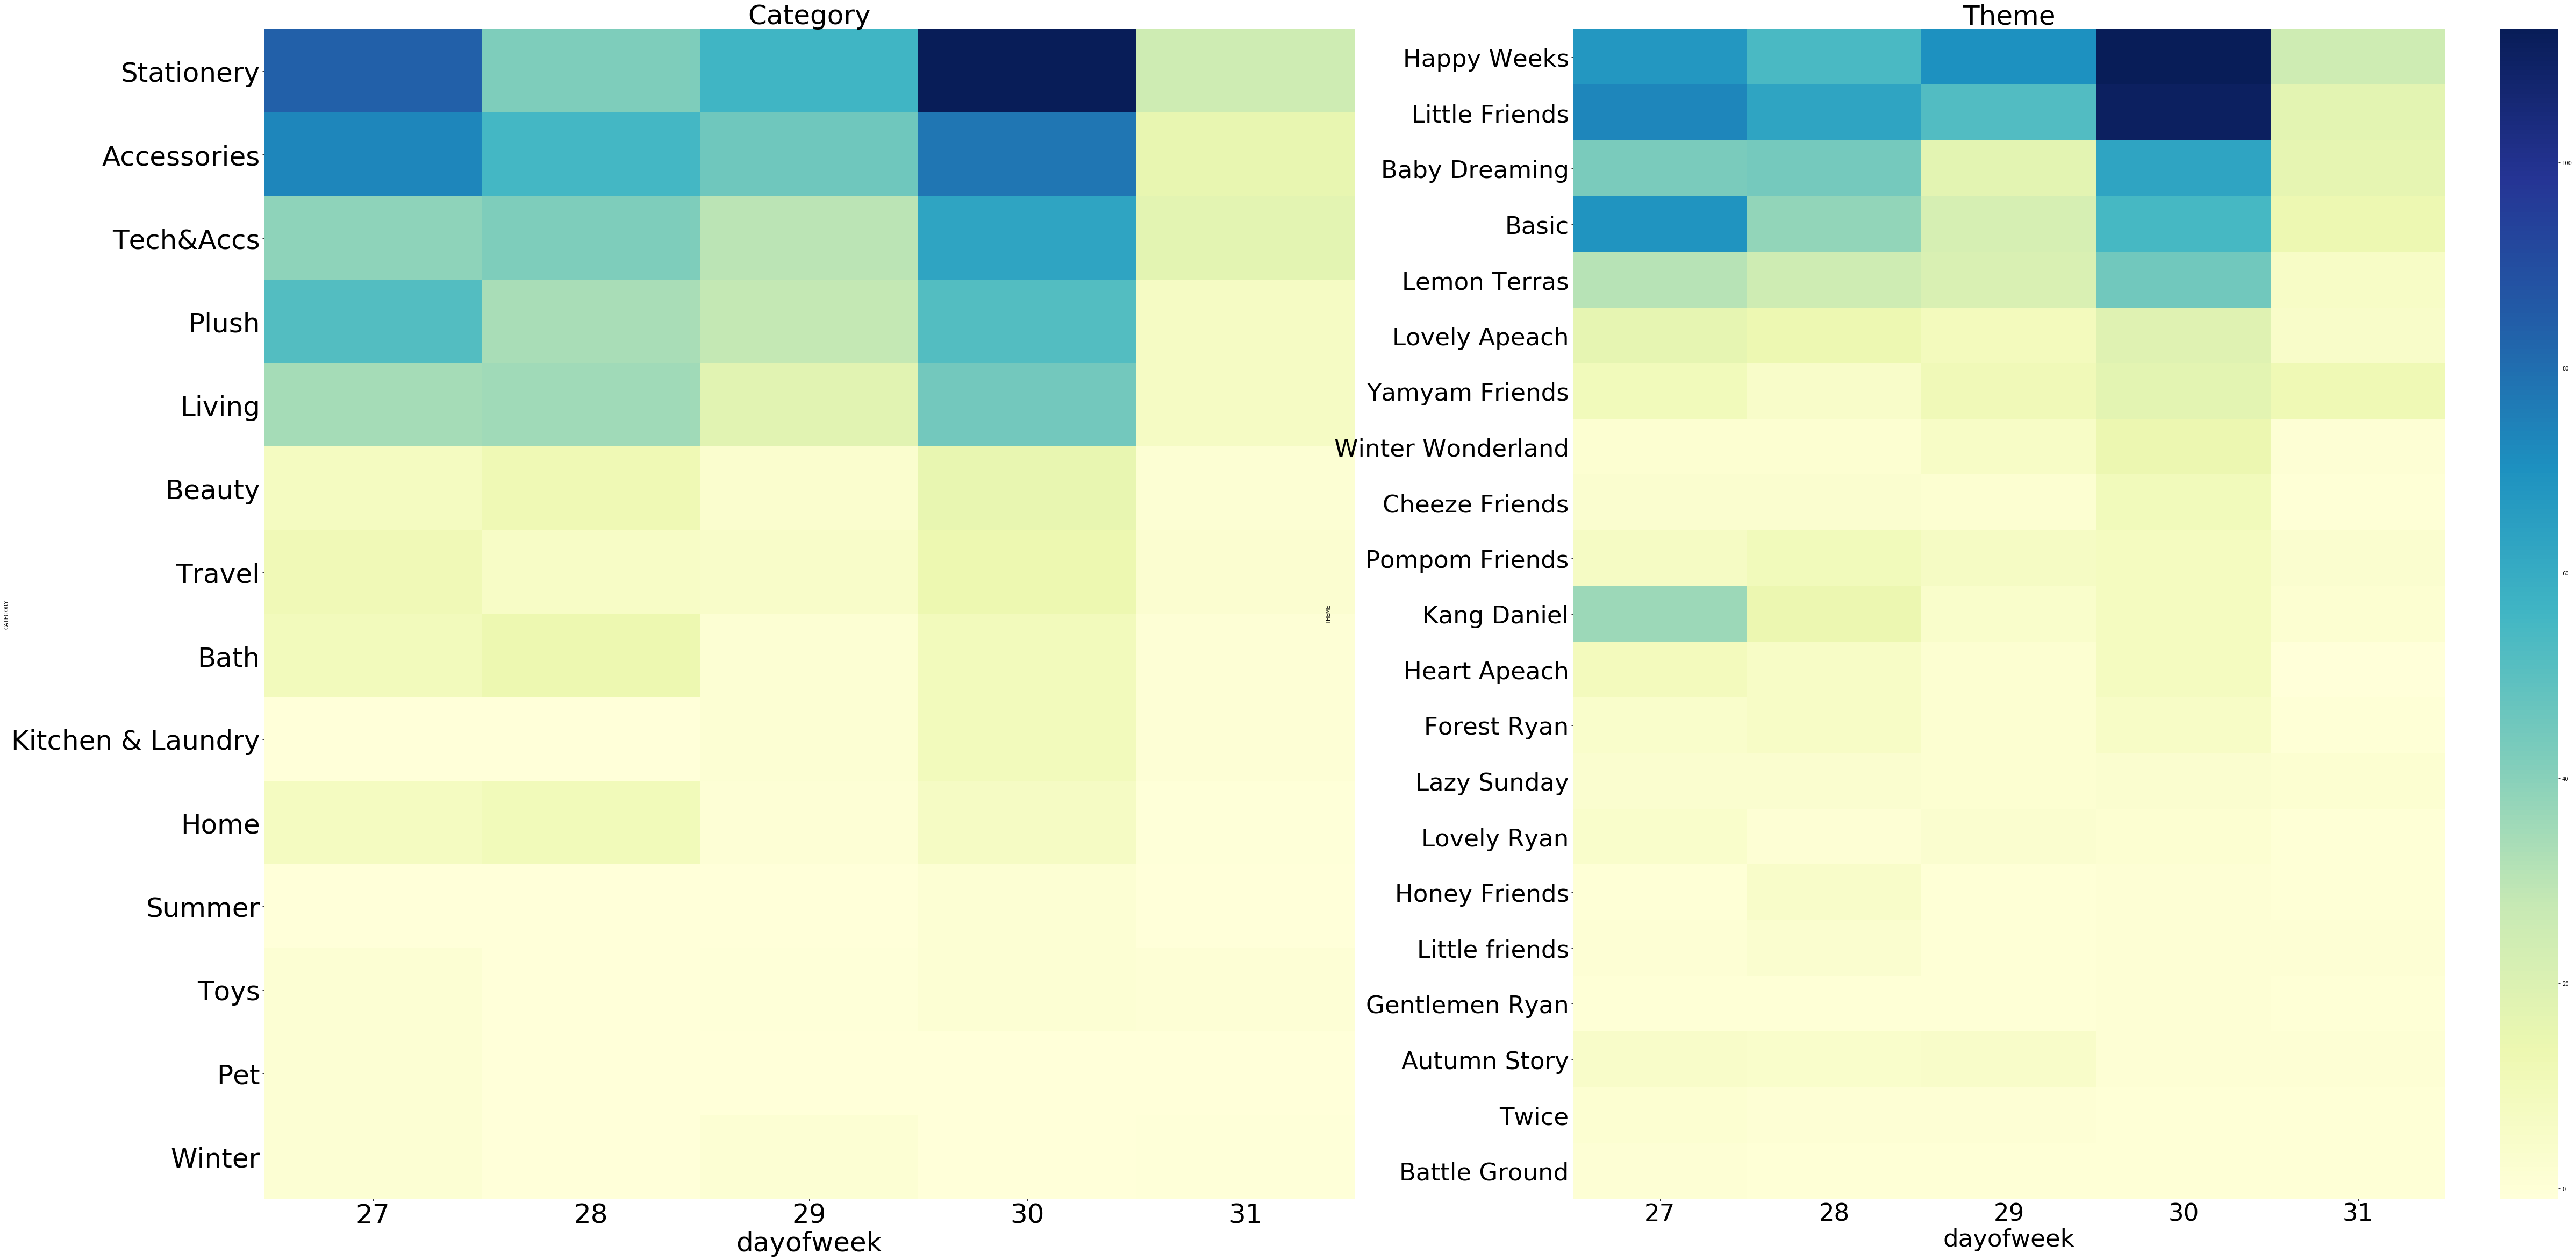

In [58]:
plt.rcParams['figure.figsize'] = [80, 40]


plt.subplot(1,2,1)
category_overall_heatmap = heatmap(category_overall, 'Category', 25, 50, 50, False)

plt.subplot(1,2,2) 
theme_overall_heatmap = heatmap(theme_overall, 'Theme', 25, 50, 45, True)



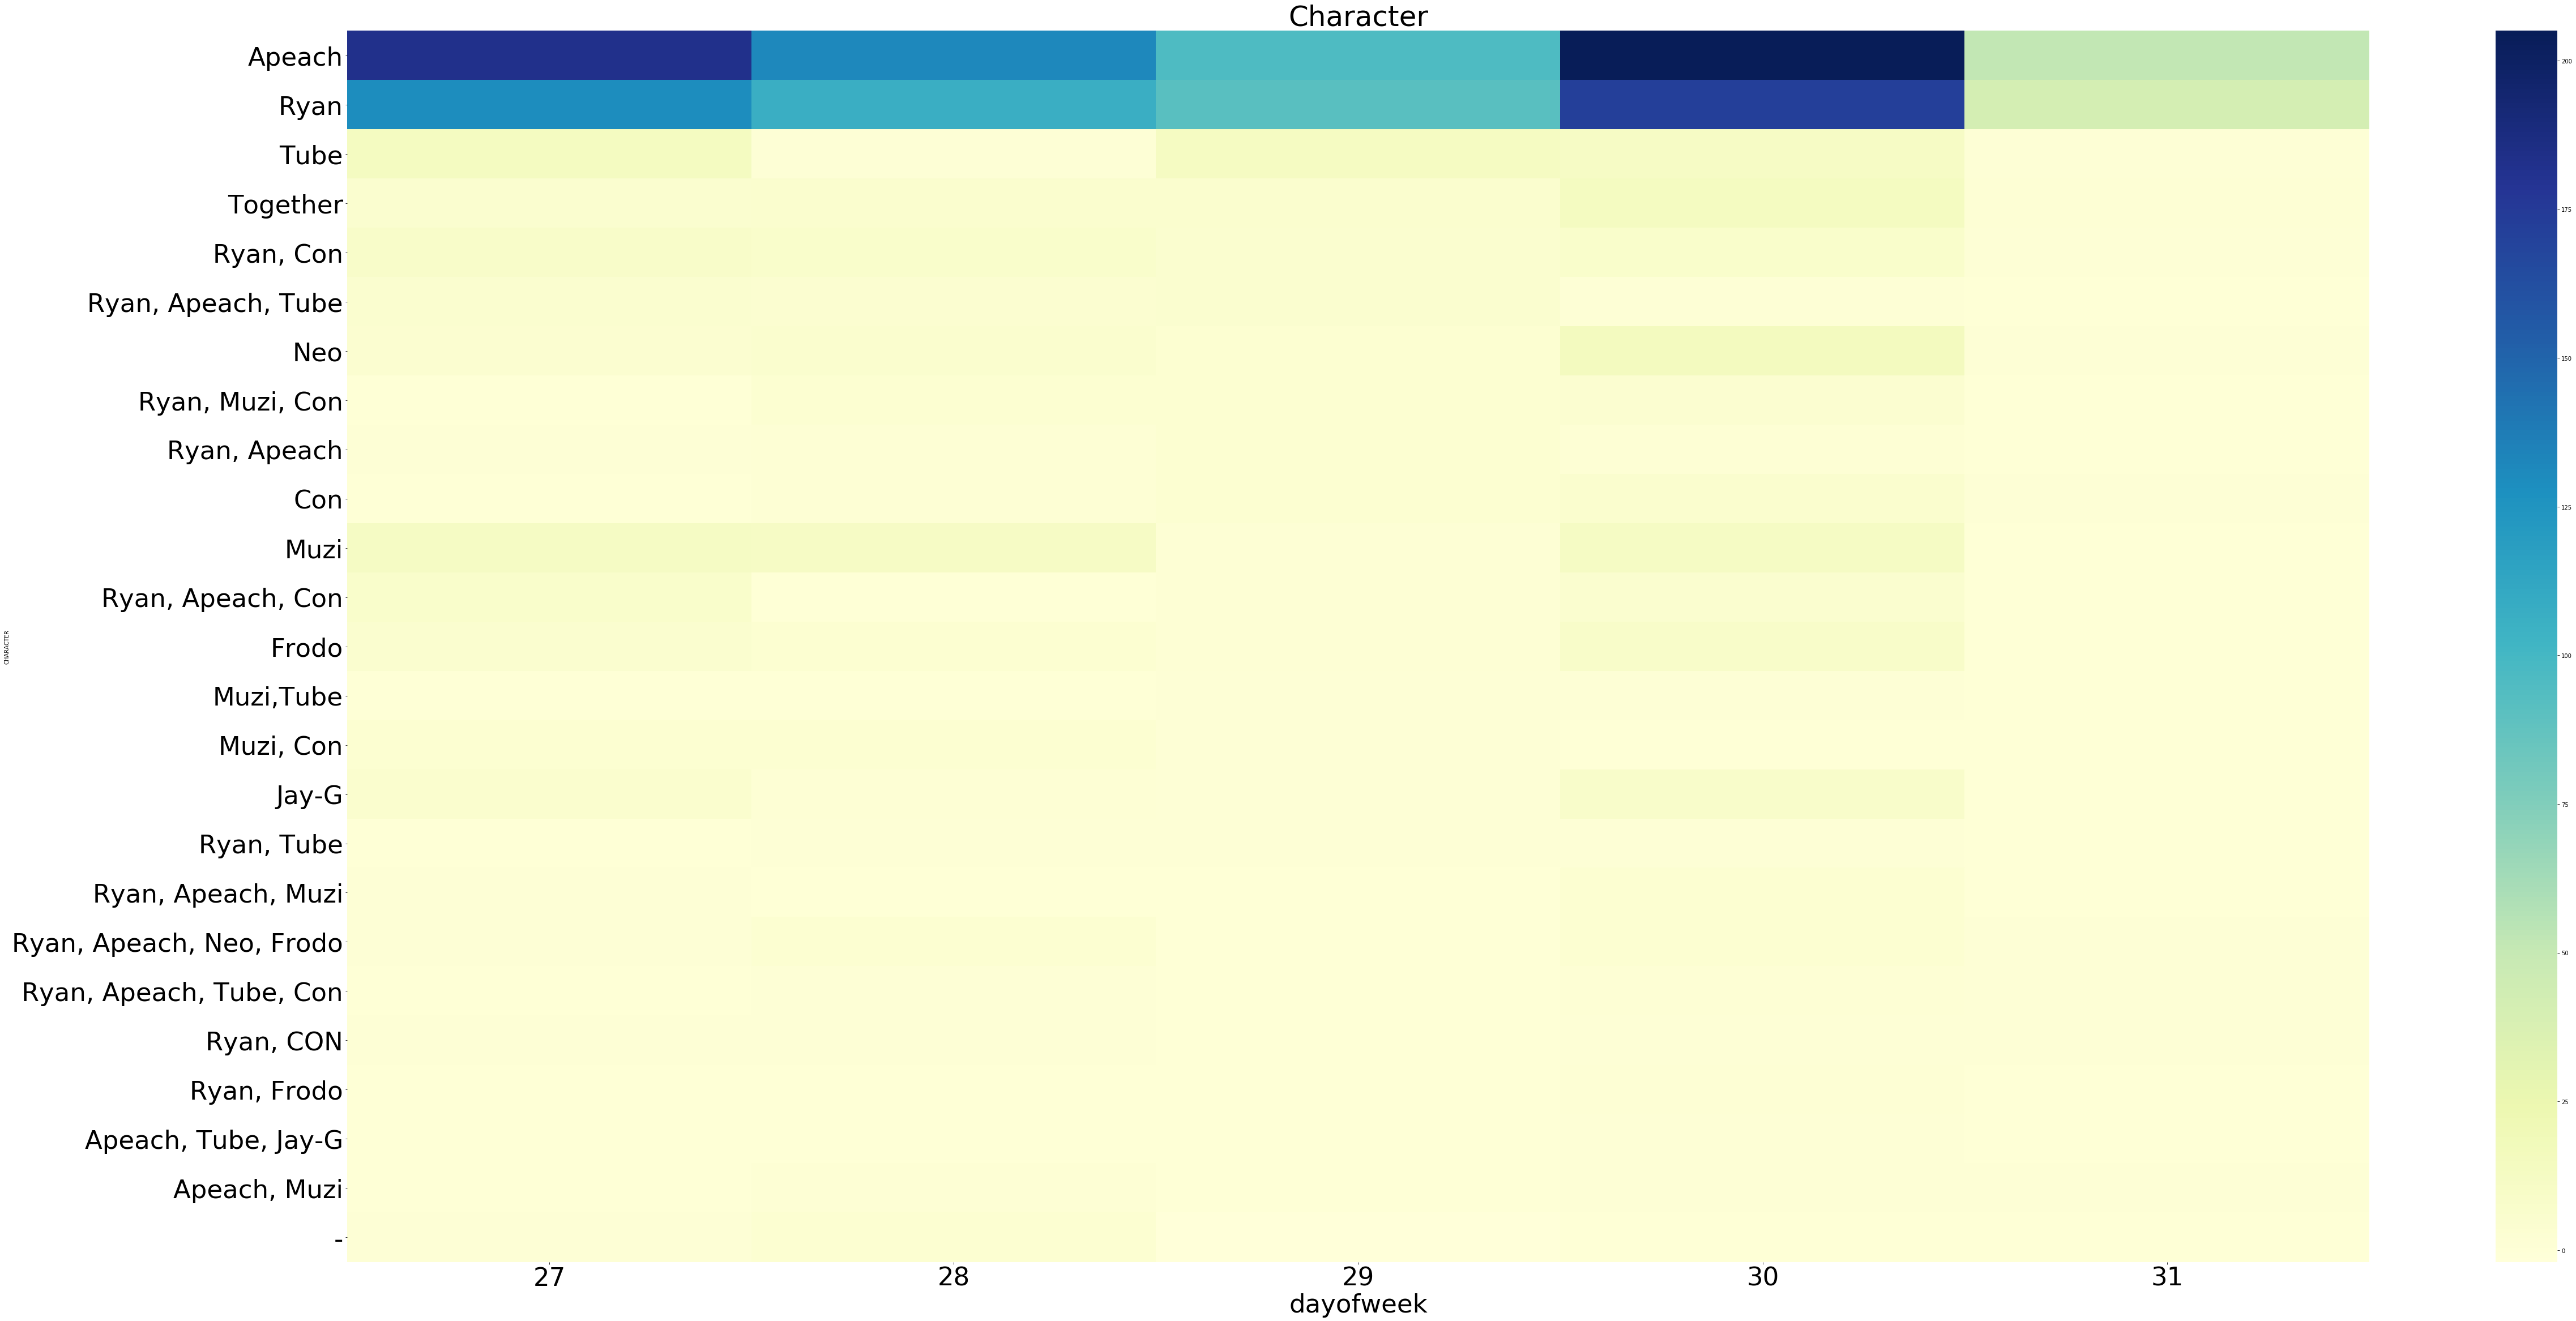

In [59]:
character_overall_heatmap = heatmap(character_overall, 'Character', 40, 50, 45, True)


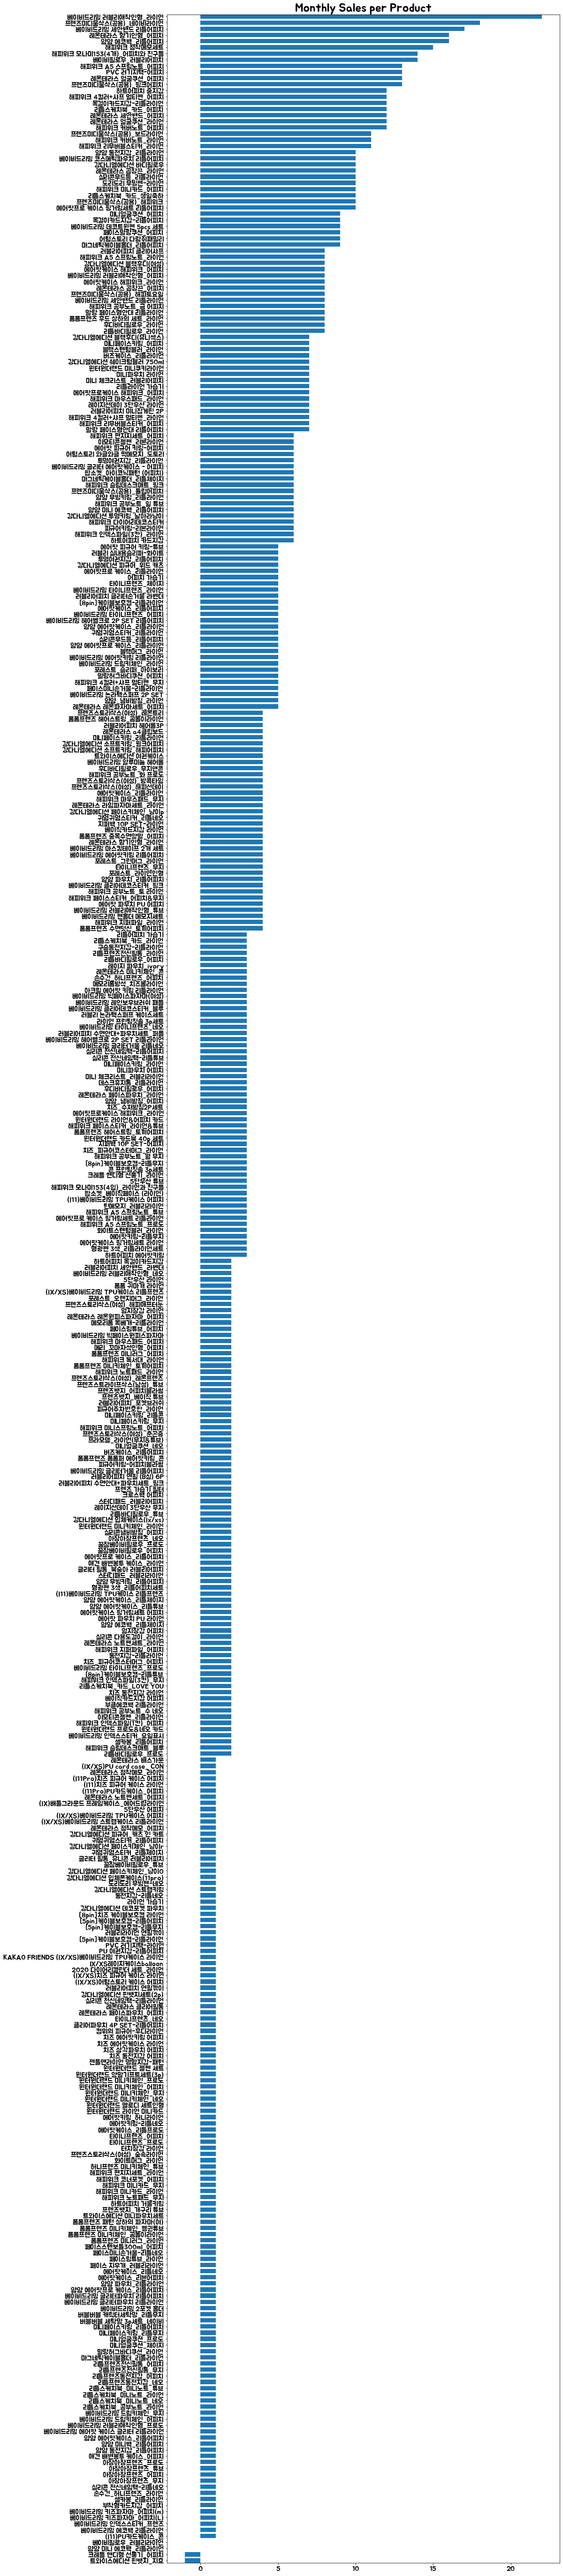

In [63]:
#monthly_sale.plot(kind="barh")
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Users\\Joanna Kang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMJUA_ttf.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = [15, 100]
#fig = plt.figure(figsize=(12, 100))
#ax = fig.add_subplot(111)

x = []
y = []

for i in range(len(monthly_sale.index)):
    x.append(monthly_sale.index[i])
    y.append(monthly_sale[7][i])

plt.barh(x, y, height=0.7) 
plt.tick_params(labelsize = 15)
plt.margins(y=0)
plt.title('Monthly Sales per Product', fontsize = 25)

plt.show()